### Exploratory analysis on video games sales data!


### Step 1: <span style="color:green">Import Libraries</span> 


**matplotlib** - This is Python's basic plotting library

**Seaborn** - This library will enable us to create aesthetically pleasing plots.

**Pandas** - This library will enable us to view and manipulate data in a tabular format.


    

In [2]:
import matplotlib as mpl
import matplotlib.pyplot as plt 
import matplotlib.dates as md
%matplotlib inline
import seaborn as sns
import pandas as pd
import statsmodels.api as sm
import numpy as np

from statsmodels.regression.rolling import RollingOLS


mpl.rcParams['figure.figsize'] = (20,10)

### Step 2: <span style="color:green">Importing dataset</span> 


1.import the datasource and store them in the dataframes and here we will use the 'header' argument to ensure your columns has meaningful names.

2.print the dataframes using the .describe() and .info()

In [3]:
df = pd.read_csv("vgsales.csv")

# print first 10 entries in dataset
df.head(10)


,Rank,Name,Platform,Year,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Global_Sales
0,1,Wii Sports,Wii,2006.0,Sports,Nintendo,41.49,29.02,3.77,8.46,82.74
1,2,Super Mario Bros.,NES,1985.0,Platform,Nintendo,29.08,3.58,6.81,0.77,40.24
2,3,Mario Kart Wii,Wii,2008.0,Racing,Nintendo,15.85,12.88,3.79,3.31,35.82
3,4,Wii Sports Resort,Wii,2009.0,Sports,Nintendo,15.75,11.01,3.28,2.96,33.00
4,5,Pokemon Red/Pokemon Blue,GB,1996.0,Role-Playing,Nintendo,11.27,8.89,10.22,1.00,31.37
5,6,Tetris,GB,1989.0,Puzzle,Nintendo,23.20,2.26,4.22,0.58,30.26
6,7,New Super Mario Bros.,DS,2006.0,Platform,Nintendo,11.38,9.23,6.50,2.90,30.01
7,8,Wii Play,Wii,2006.0,Misc,Nintendo,14.03,9.20,2.93,2.85,29.02
8,9,New Super Mario Bros. Wii,Wii,2009.0,Platform,Nintendo,14.59,7.06,4.70,2.26,28.62
9,10,Duck Hunt,NES,1984.0,Shooter,Nintendo,26.93,0.63,0.28,0.47,28.31


### Step 3: <span style="color:green">Understanding Data and Data Cleaning</span> 

In [15]:
df.shape

(16598, 10)

In [16]:
df.columns

Index(['Name', 'Platform', 'Year', 'Genre', 'Publisher', 'NA_Sales',
       'EU_Sales', 'JP_Sales', 'Other_Sales', 'Global_Sales'],
      dtype='object')

**Finding Unique Values for specific Column**

In [17]:
df['Platform'].unique()

array(['Wii', 'NES', 'GB', 'DS', 'X360', 'PS3', 'PS2', 'SNES', 'GBA',
       '3DS', 'PS4', 'N64', 'PS', 'XB', 'PC', '2600', 'PSP', 'XOne', 'GC',
       'WiiU', 'GEN', 'DC', 'PSV', 'SAT', 'SCD', 'WS', 'NG', 'TG16',
       '3DO', 'GG', 'PCFX'], dtype=object)

In [180]:
df['Platform'].value_counts()

DS      2163
PS2     2161
PS3     1329
Wii     1325
X360    1265
PSP     1213
PS      1196
PC       960
XB       824
GBA      822
GC       556
3DS      509
PSV      413
PS4      336
N64      319
SNES     239
XOne     213
SAT      173
WiiU     143
2600     133
GB        98
NES       98
DC        52
GEN       27
NG        12
SCD        6
WS         6
3DO        3
TG16       2
GG         1
PCFX       1
Name: Platform, dtype: int64

**Checking Unique values in dataset**

In [181]:
df.nunique()

Name            11493
Platform           31
Year               39
Genre              12
Publisher         578
NA_Sales          409
EU_Sales          305
JP_Sales          244
Other_Sales       157
Global_Sales      623
dtype: int64

### Step 4: <span style="color:green">Clean the data</span> 

**Find and Remove the NULL values**

In [182]:
df.isnull().sum()

Name              0
Platform          0
Year            271
Genre             0
Publisher        58
NA_Sales          0
EU_Sales          0
JP_Sales          0
Other_Sales       0
Global_Sales      0
dtype: int64

In [183]:
df = df.dropna()
df.isnull().sum()

Name            0
Platform        0
Year            0
Genre           0
Publisher       0
NA_Sales        0
EU_Sales        0
JP_Sales        0
Other_Sales     0
Global_Sales    0
dtype: int64

**The year is in float, we'll convert it in to integer**

In [143]:
df.Year.unique()

array([2006., 1985., 2008., 2009., 1996., 1989., 1984., 2005., 1999.,
       2007., 2010., 2013., 2004., 1990., 1988., 2002., 2001., 2011.,
       1998., 2015., 2012., 2014., 1992., 1997., 1993., 1994., 1982.,
       2003., 1986., 2000.,   nan, 1995., 2016., 1991., 1981., 1987.,
       1980., 1983., 2020., 2017.])

In [145]:
df.head(10) #To display Top 10 rows of the dataset

,Name,Platform,Year,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Global_Sales
Rank,,,,,,,,,,
1,Wii Sports,Wii,2006.0,Sports,Nintendo,41.49,29.02,3.77,8.46,82.74
2,Super Mario Bros.,NES,1985.0,Platform,Nintendo,29.08,3.58,6.81,0.77,40.24
3,Mario Kart Wii,Wii,2008.0,Racing,Nintendo,15.85,12.88,3.79,3.31,35.82
4,Wii Sports Resort,Wii,2009.0,Sports,Nintendo,15.75,11.01,3.28,2.96,33.00
5,Pokemon Red/Pokemon Blue,GB,1996.0,Role-Playing,Nintendo,11.27,8.89,10.22,1.00,31.37
6,Tetris,GB,1989.0,Puzzle,Nintendo,23.20,2.26,4.22,0.58,30.26
7,New Super Mario Bros.,DS,2006.0,Platform,Nintendo,11.38,9.23,6.50,2.90,30.01
8,Wii Play,Wii,2006.0,Misc,Nintendo,14.03,9.20,2.93,2.85,29.02
9,New Super Mario Bros. Wii,Wii,2009.0,Platform,Nintendo,14.59,7.06,4.70,2.26,28.62


In [146]:
df['Publisher'].unique()

array(['Nintendo', 'Microsoft Game Studios', 'Take-Two Interactive',
       'Sony Computer Entertainment', 'Activision', 'Ubisoft',
       'Bethesda Softworks', 'Electronic Arts', 'Sega', 'SquareSoft',
       'Atari', '505 Games', 'Capcom', 'GT Interactive',
       'Konami Digital Entertainment',
       'Sony Computer Entertainment Europe', 'Square Enix', 'LucasArts',
       'Virgin Interactive', 'Warner Bros. Interactive Entertainment',
       'Universal Interactive', 'Eidos Interactive', 'RedOctane',
       'Vivendi Games', 'Enix Corporation', 'Namco Bandai Games',
       'Palcom', 'Hasbro Interactive', 'THQ', 'Fox Interactive',
       'Acclaim Entertainment', 'MTV Games', 'Disney Interactive Studios',
       nan, 'Majesco Entertainment', 'Codemasters', 'Red Orb', 'Level 5',
       'Arena Entertainment', 'Midway Games', 'JVC', 'Deep Silver',
       '989 Studios', 'NCSoft', 'UEP Systems', 'Parker Bros.', 'Maxis',
       'Imagic', 'Tecmo Koei', 'Valve Software', 'ASCII Entertainment',


In [147]:
df['Publisher'].value_counts()

Electronic Arts                 1351
Activision                       975
Namco Bandai Games               932
Ubisoft                          921
Konami Digital Entertainment     832
                                ... 
Naxat Soft                         1
Kando Games                        1
SPS                                1
Tetris Online                      1
Revolution (Japan)                 1
Name: Publisher, Length: 578, dtype: int64

In [148]:
df['Genre'].unique()

array(['Sports', 'Platform', 'Racing', 'Role-Playing', 'Puzzle', 'Misc',
       'Shooter', 'Simulation', 'Action', 'Fighting', 'Adventure',
       'Strategy'], dtype=object)

### Step 5: <span style="color:green">Descriptive Statistics</span> 

In [8]:
df.describe()

,Year,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Global_Sales
count,16327.000000,16598.000000,16598.000000,16598.000000,16598.000000,16598.000000
mean,2006.406443,0.264667,0.146652,0.077782,0.048063,0.537441
std,5.828981,0.816683,0.505351,0.309291,0.188588,1.555028
min,1980.000000,0.000000,0.000000,0.000000,0.000000,0.010000
25%,2003.000000,0.000000,0.000000,0.000000,0.000000,0.060000
50%,2007.000000,0.080000,0.020000,0.000000,0.010000,0.170000
75%,2010.000000,0.240000,0.110000,0.040000,0.040000,0.470000
max,2020.000000,41.490000,29.020000,10.220000,10.570000,82.740000


**Observation:** 
Games released between 1980 to 2020
Mean/Average sales in all regions are very low compare to the Max ...

In [161]:
df.describe(include='object')

,Name,Platform,Genre,Publisher
count,16598,16598,16598,16540
unique,11493,31,12,578
top,Need for Speed: Most Wanted,DS,Action,Electronic Arts
freq,12,2163,3316,1351


In [162]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 16598 entries, 1 to 16600
Data columns (total 10 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Name          16598 non-null  object 
 1   Platform      16598 non-null  object 
 2   Year          16327 non-null  float64
 3   Genre         16598 non-null  object 
 4   Publisher     16540 non-null  object 
 5   NA_Sales      16598 non-null  float64
 6   EU_Sales      16598 non-null  float64
 7   JP_Sales      16598 non-null  float64
 8   Other_Sales   16598 non-null  float64
 9   Global_Sales  16598 non-null  float64
dtypes: float64(6), object(4)
memory usage: 2.0+ MB


### Step 6: <span style="color:green">Visualizations and Insights</span> 

**Maximum number of Games sold per Year using countplot method**

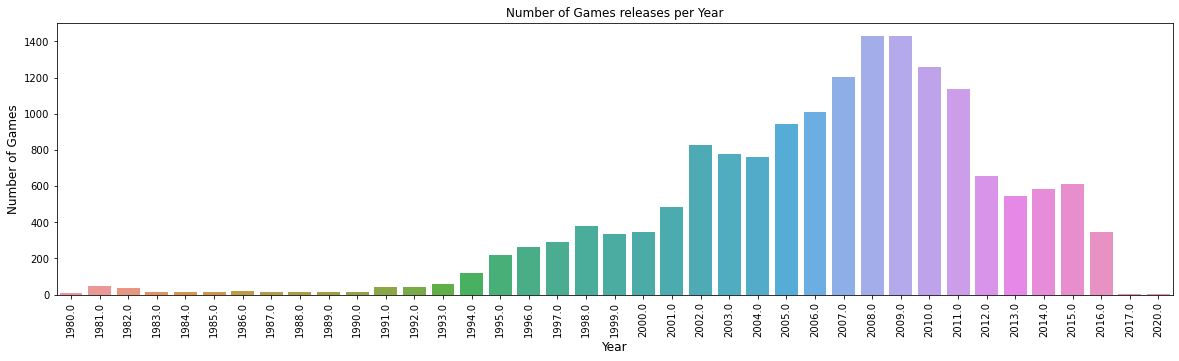

In [163]:
plt.figure(figsize = (20,5))
plt.xticks(rotation = 90)
sns.countplot(data=df,x='Year')
plt.xlabel('Year', size = 12)
plt.ylabel('Number of Games', size = 12)
plt.title('Number of Games releases per Year')
plt.show()

**Observation:** The most active Published games were in the Years **2008**  and **2009** with the number of Published popular games above have bursting with new games.

**Which Genre has the highest number of games?**

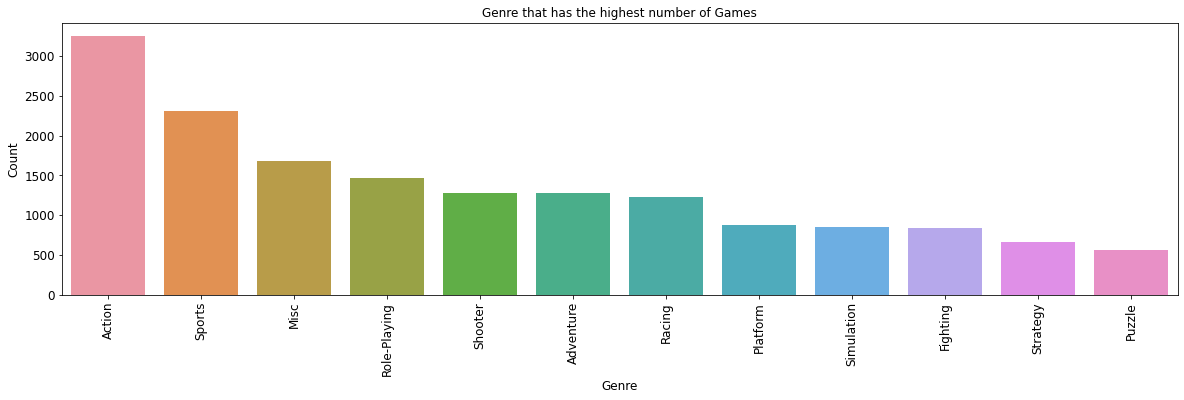

In [167]:
plt.figure(figsize=(20, 5))
plt.xticks(size =12)
plt.yticks(size =12)
sns.countplot(x="Genre", data=df, order = df['Genre'].value_counts().index)
plt.xlabel('Genre', size = 12)
plt.ylabel('Count', size = 12)
plt.xticks(rotation=90)
plt.title('Genre that has the highest number of Games')
plt.show()

**Observation:** The above visualisation clearly shows that the **action** genre has the **highest** number of games **followed by sports!**

**Historical Sales**

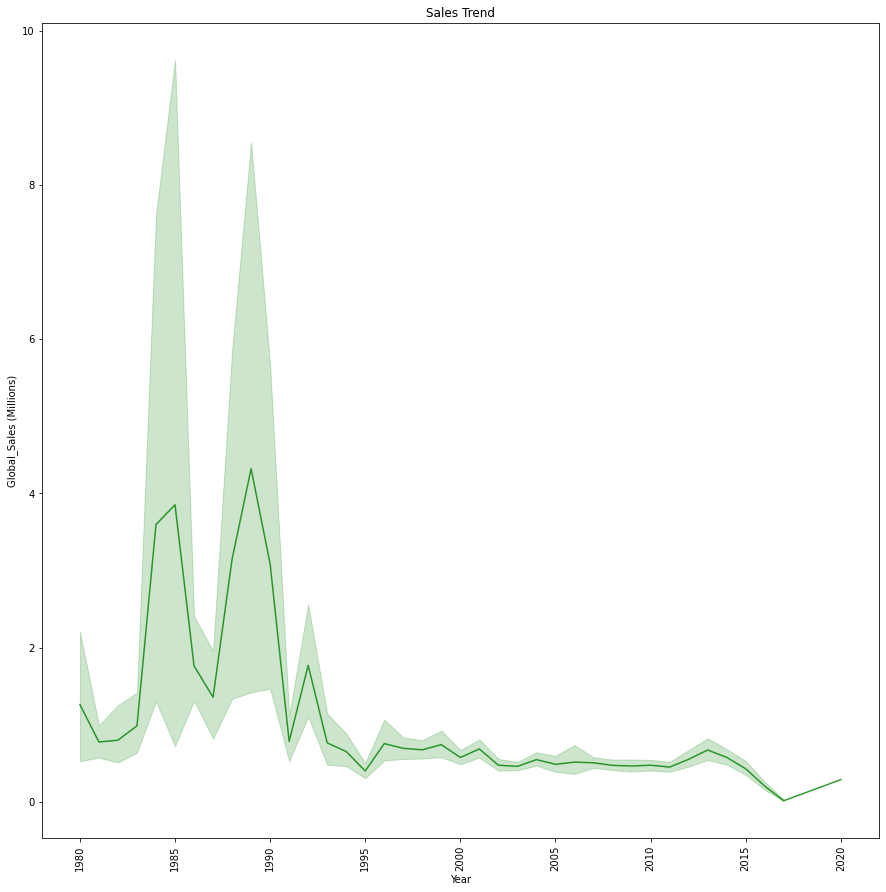

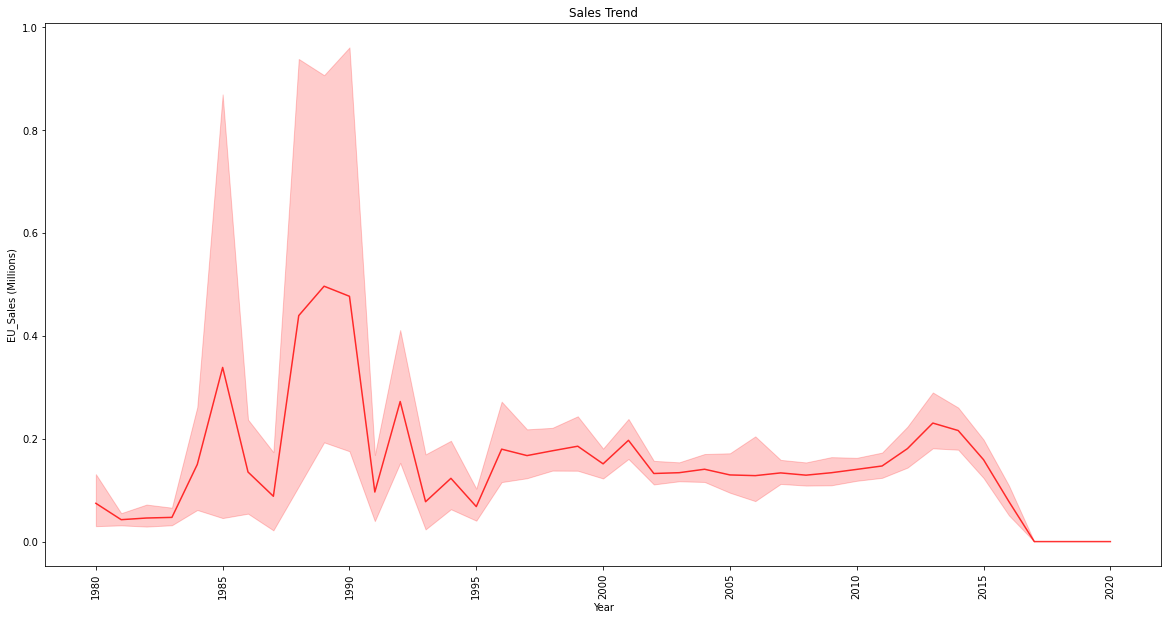

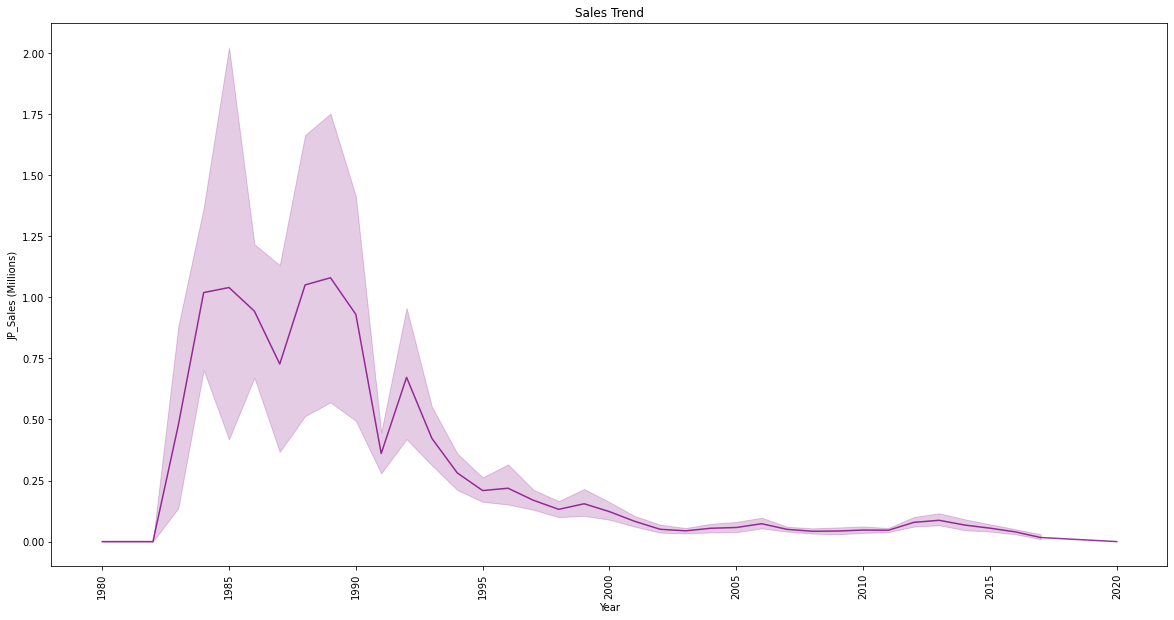

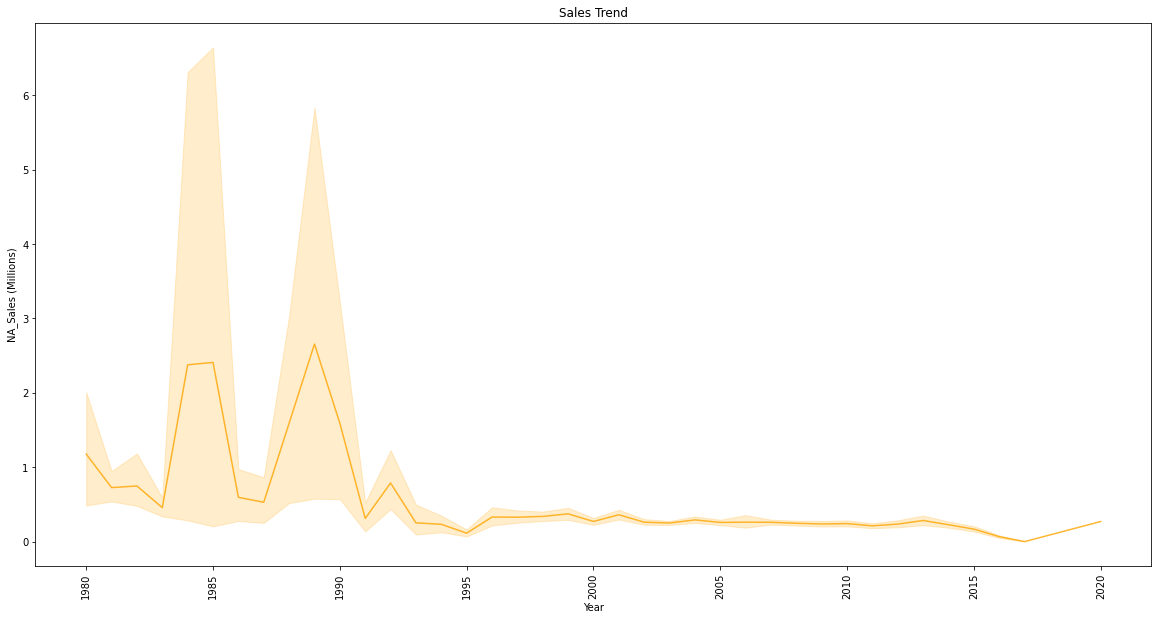

In [164]:
plt.figure(figsize=(15,15))
regions = ['Global_Sales', 'EU_Sales', 'JP_Sales','NA_Sales']
colors = {'Global_Sales': 'green',
          'EU_Sales': 'red',
          'JP_Sales': 'purple',
          'NA_Sales':'orange'
         }

for region in regions:
    sns.lineplot(x='Year',y=region,data=df,color=colors[region], alpha=0.8)
    plt.xticks(rotation=90)
    plt.xlabel("Year")
    plt.ylabel("{} (Millions)".format(region))
    plt.title("Sales Trend")
    plt.show()

**Observation:** North America sales and Global sales seems to be having upwards trend from the year 2017 onwards. We could continue to invest more in these regions while exploring options to increase sales in other regions

The main idea of seaborn is that it Provides high-level commands to create a variety of plots types useful for statistical
data exploration and even some statistical model filtering.let's take a look with our dataset and plot the types in seaborn.

**For each platform, Which year and which region had max sales?**

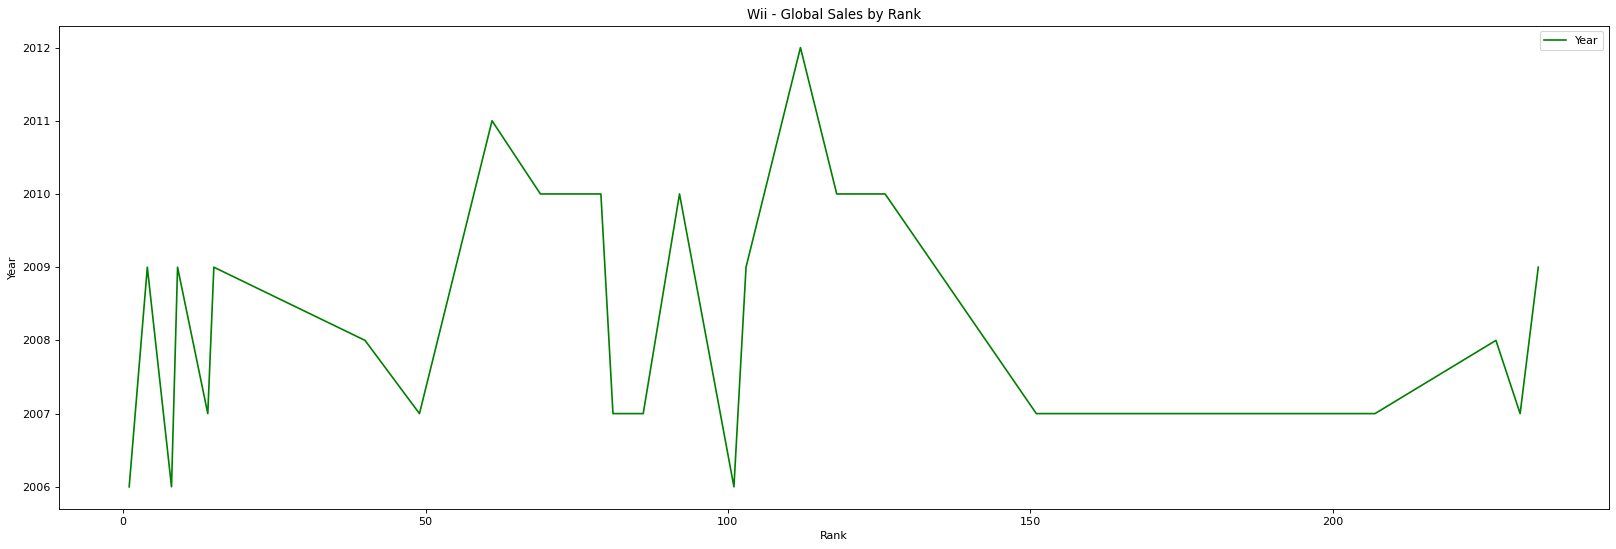

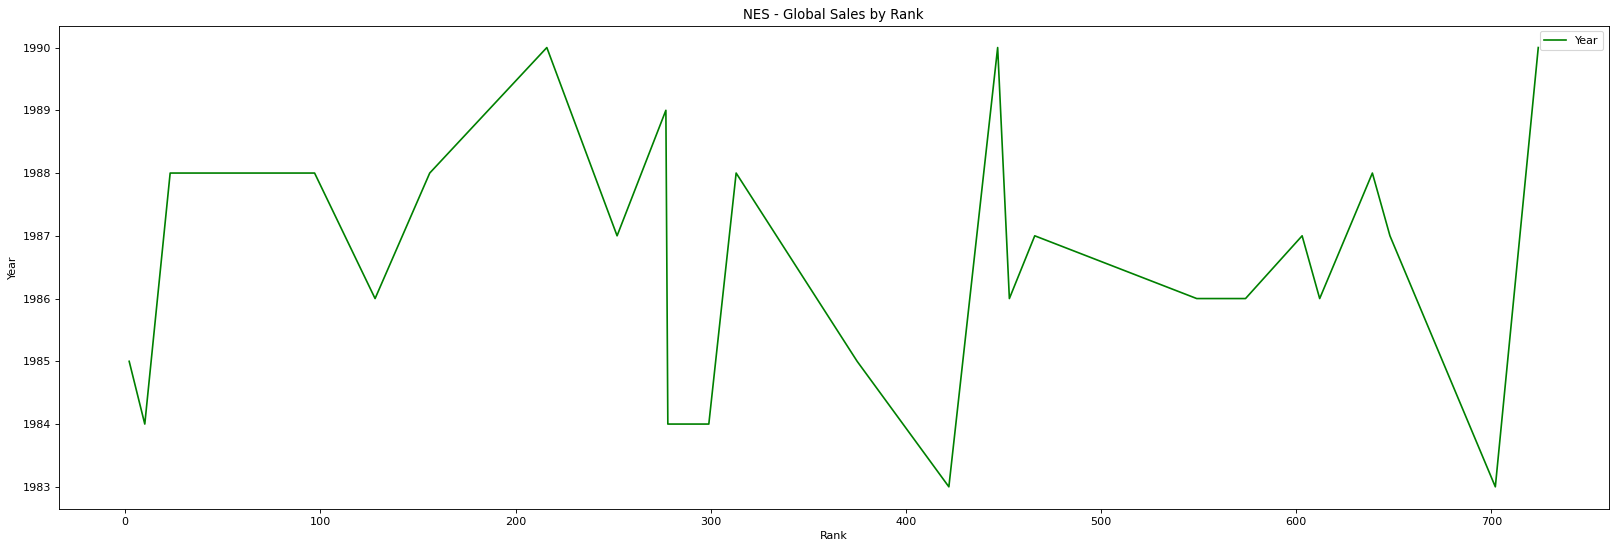

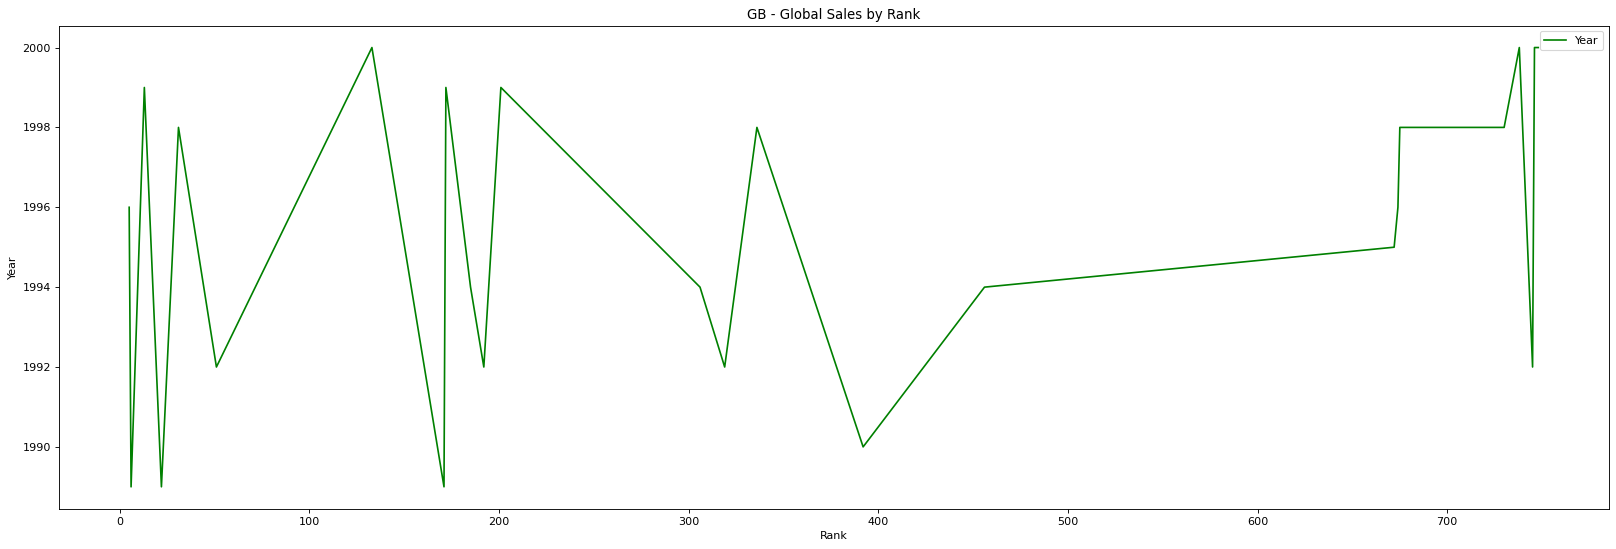

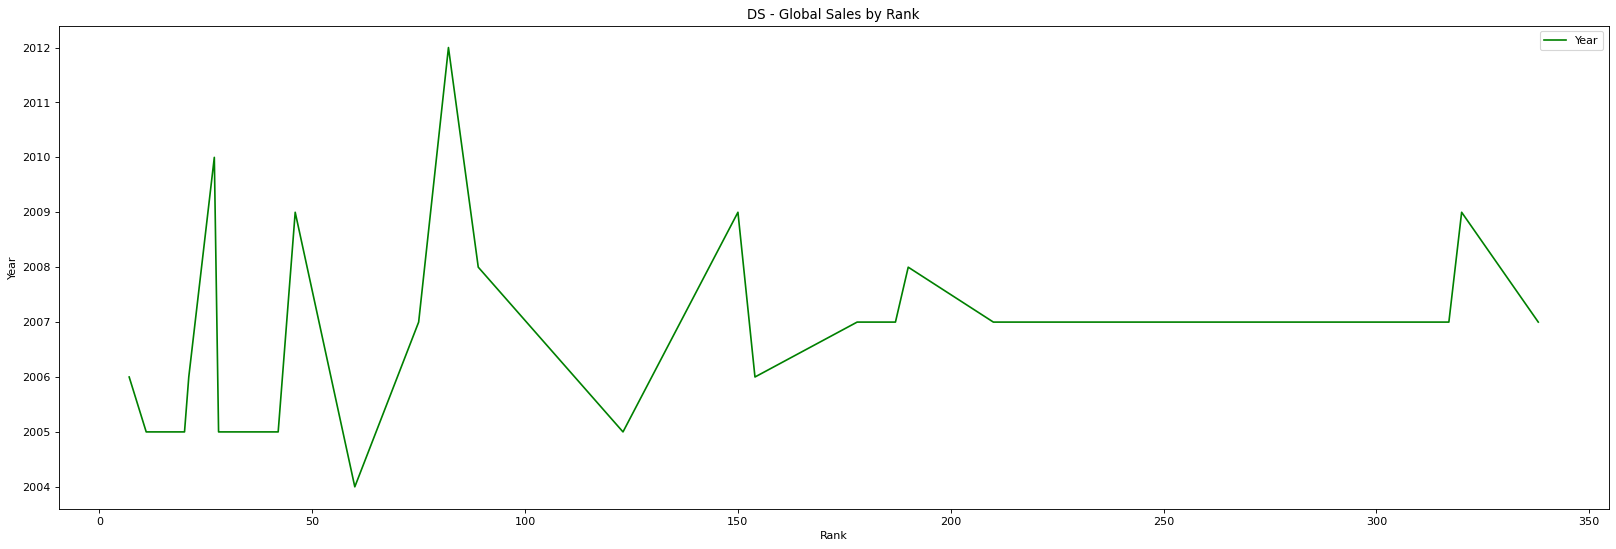

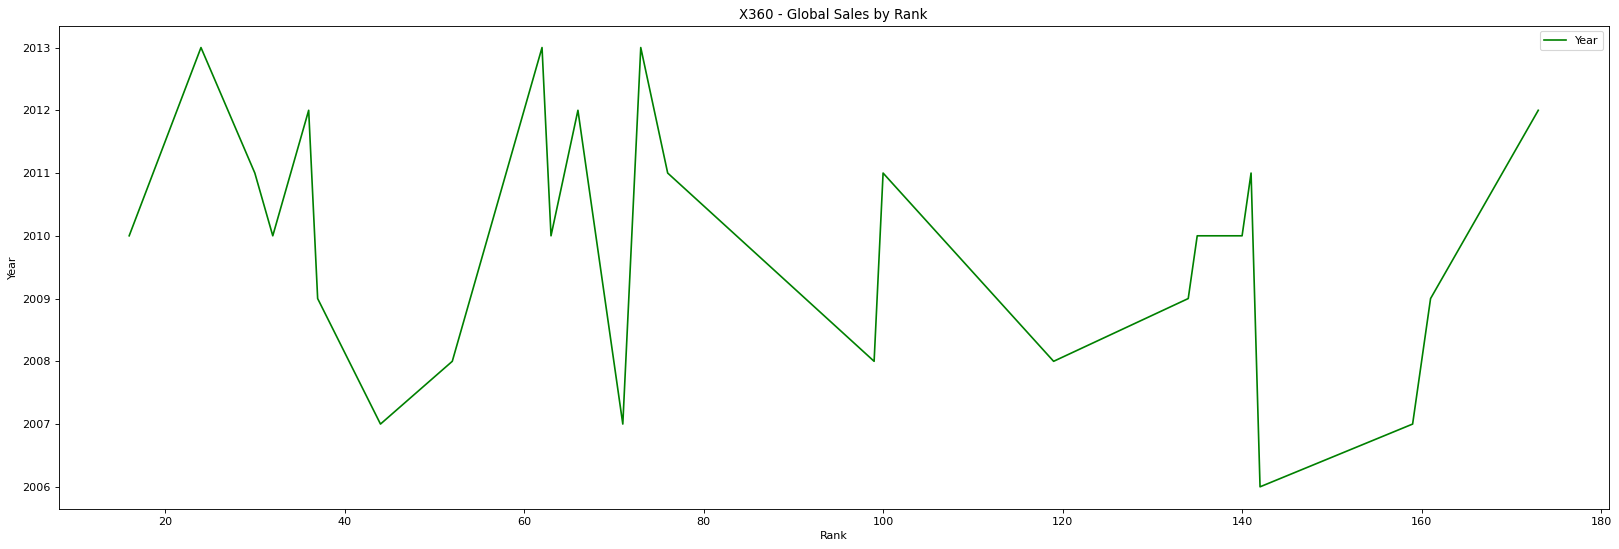

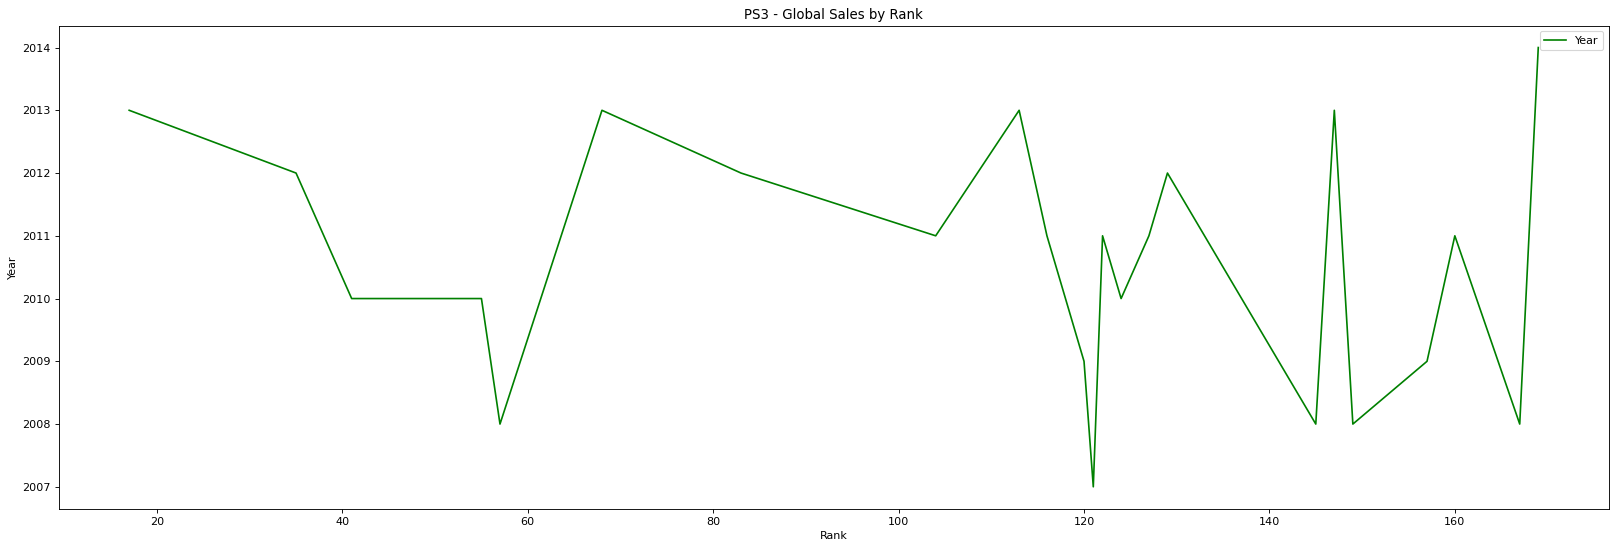

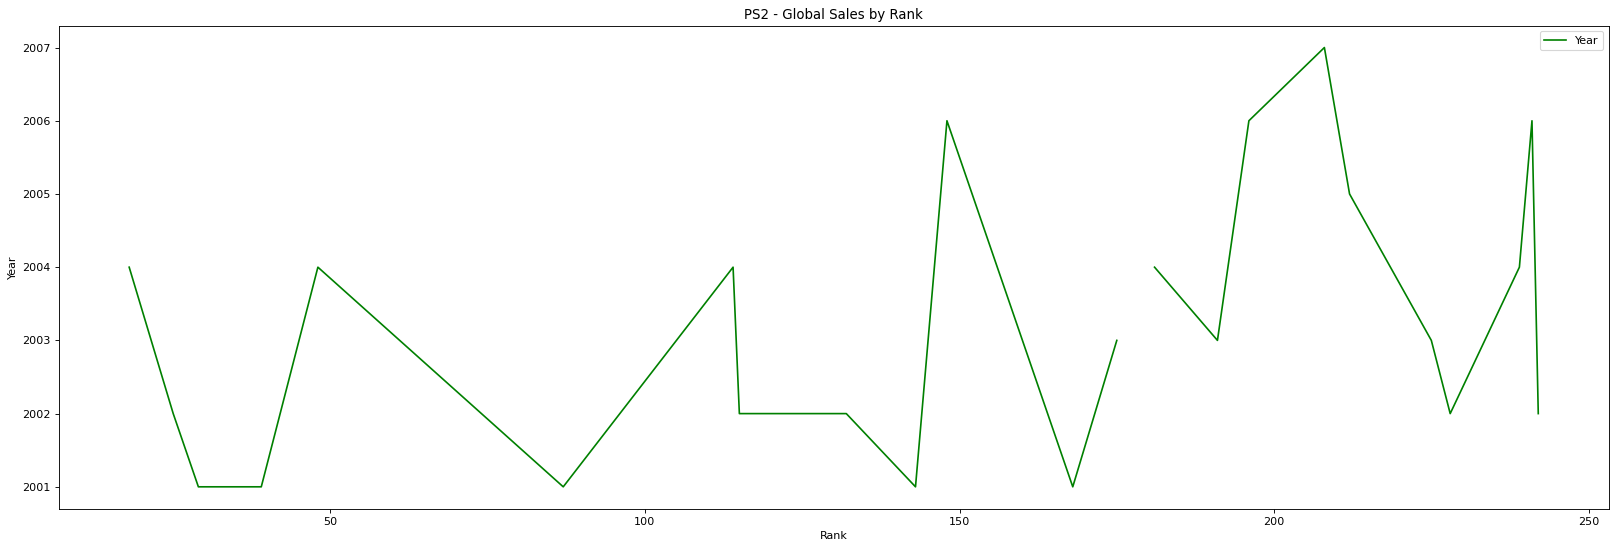

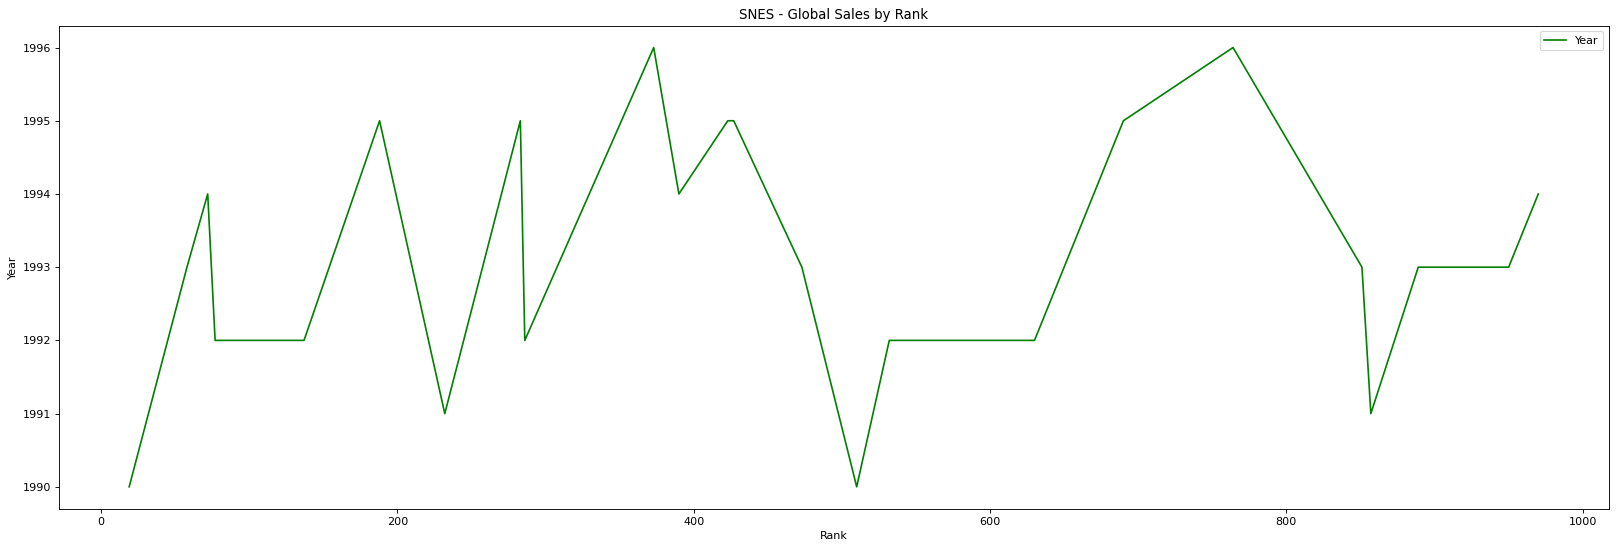

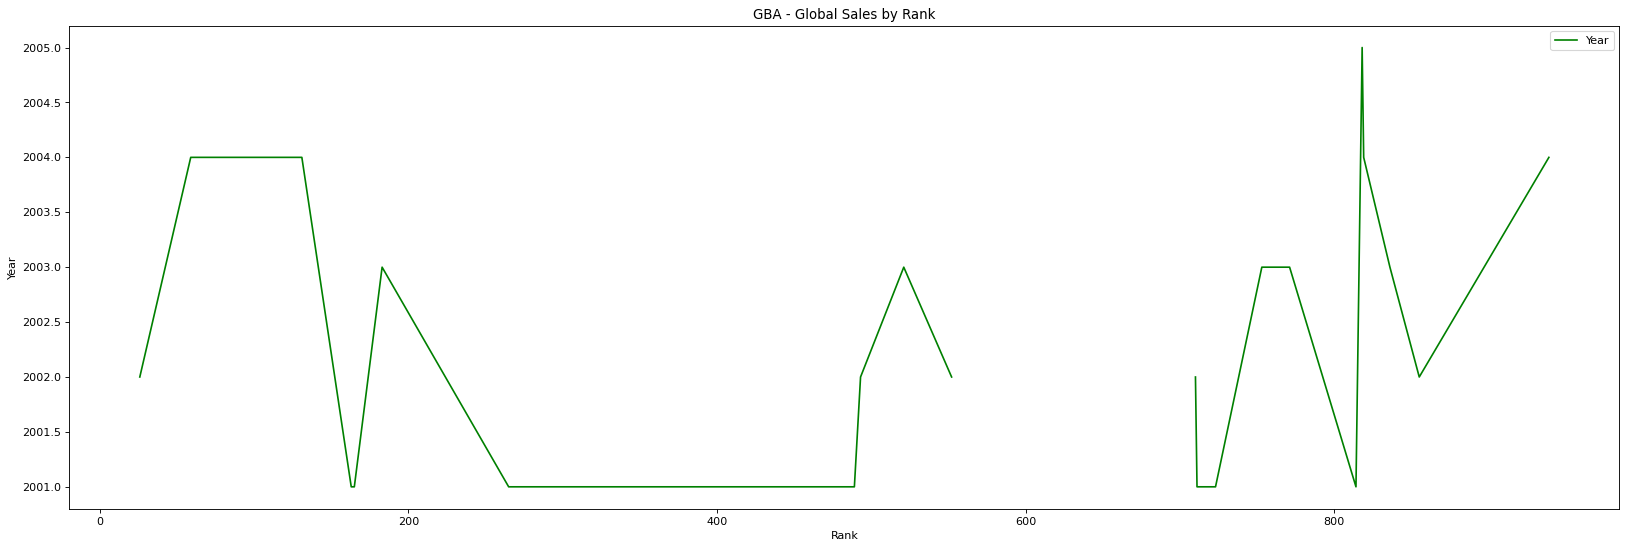

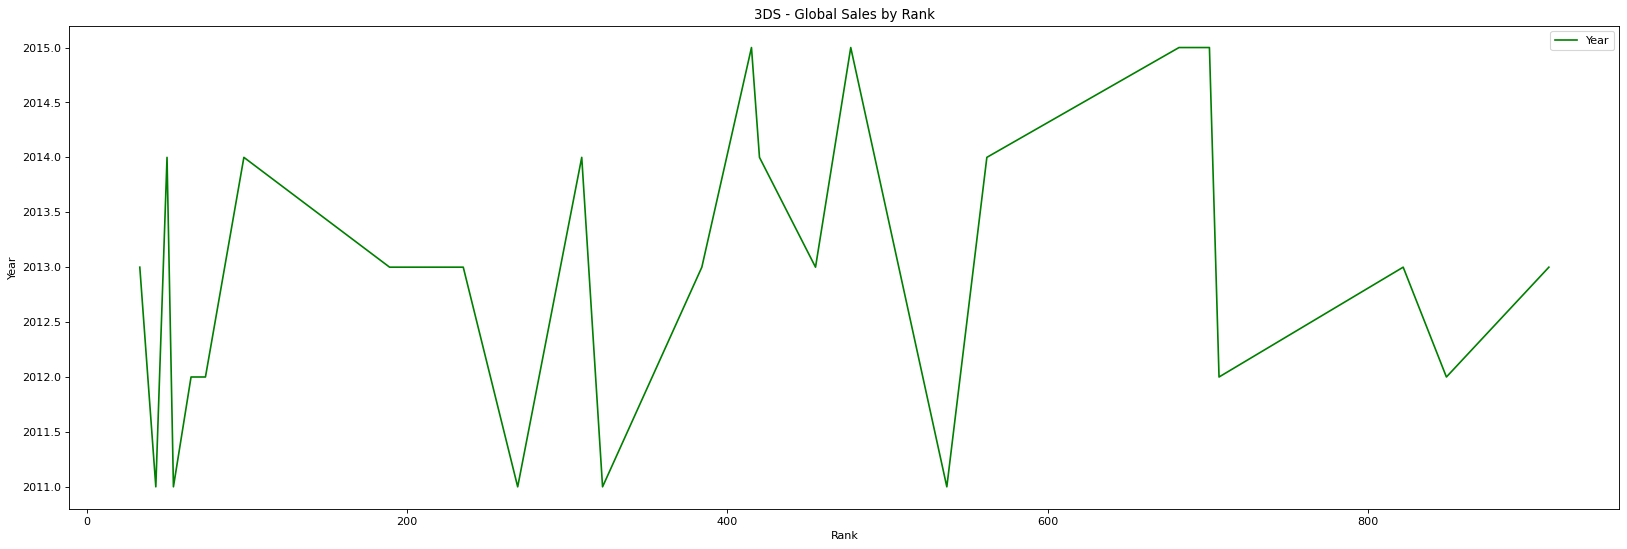

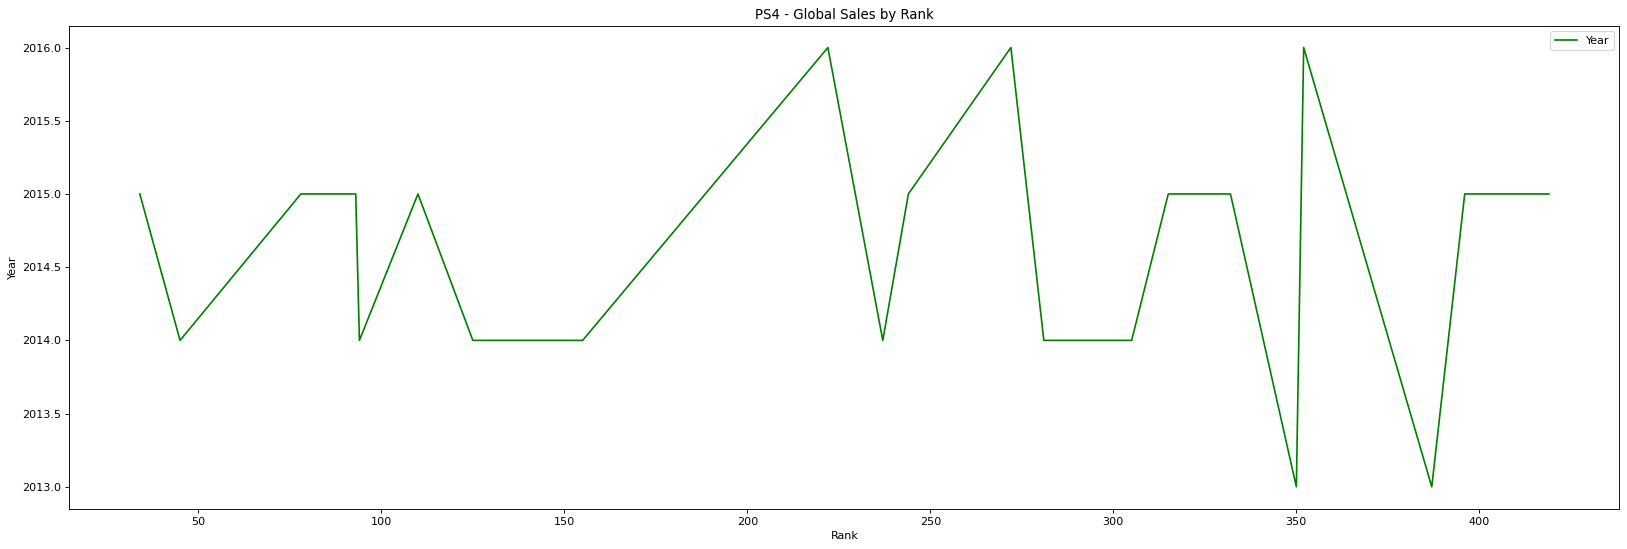

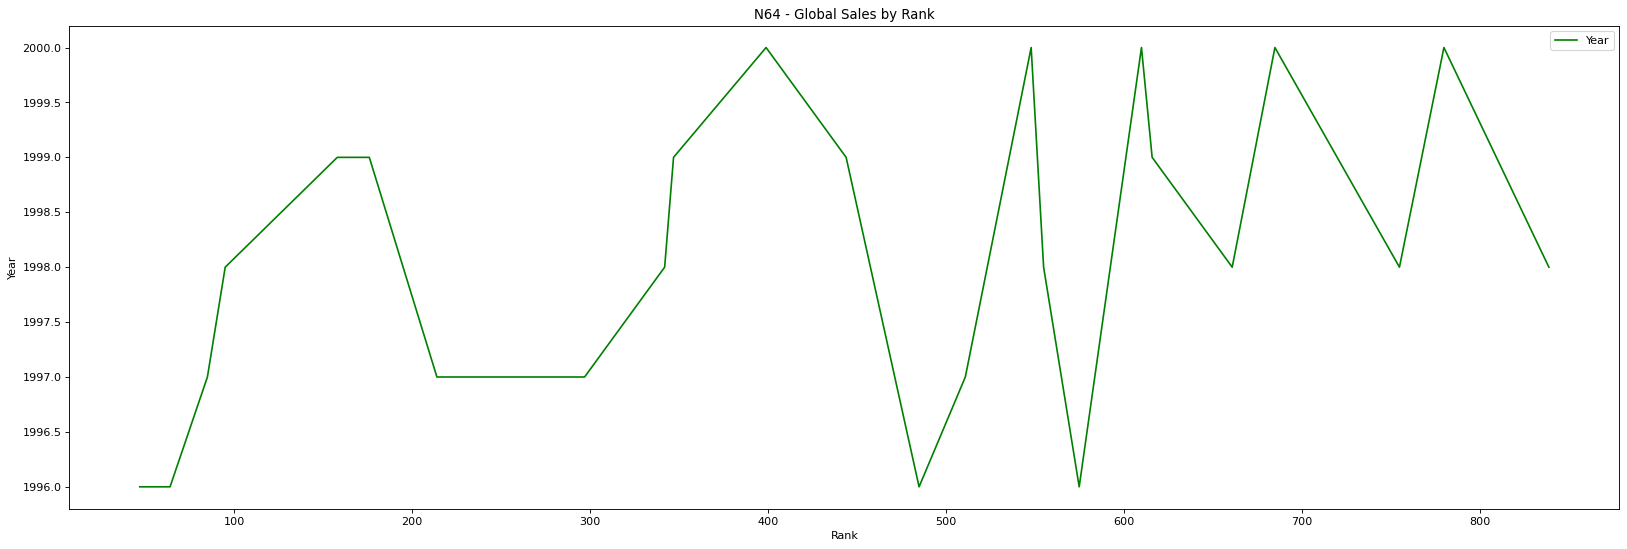

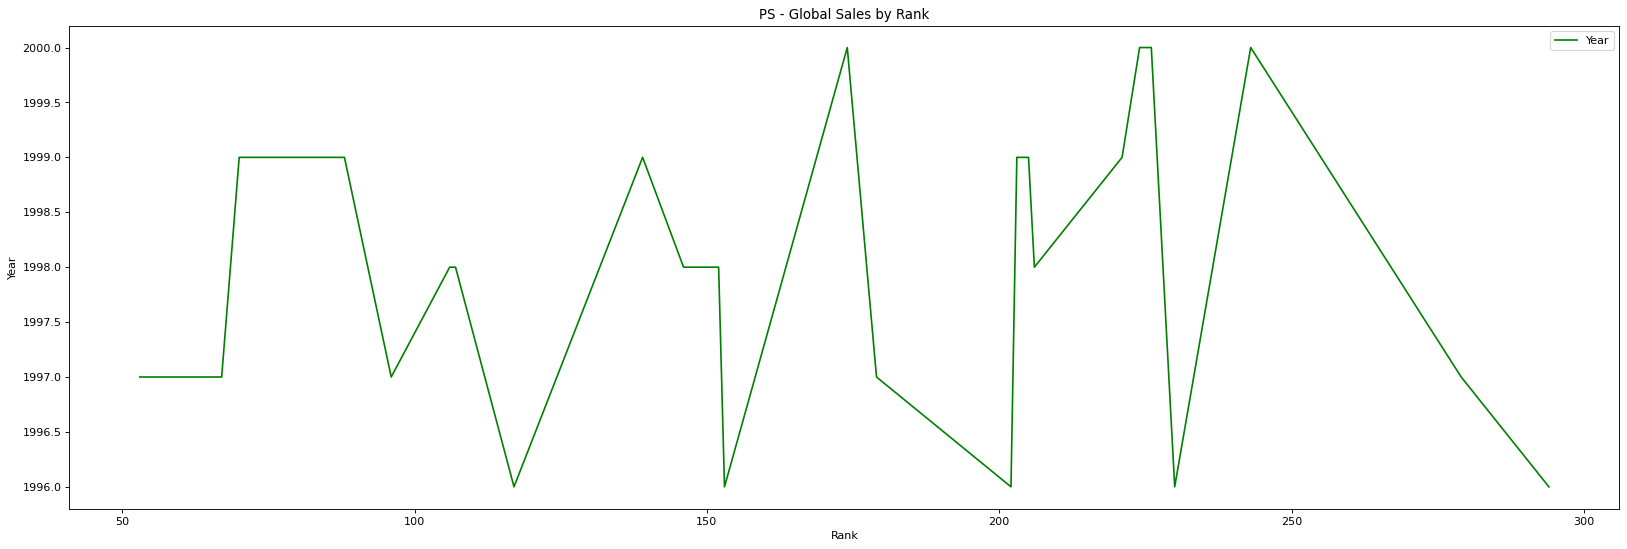

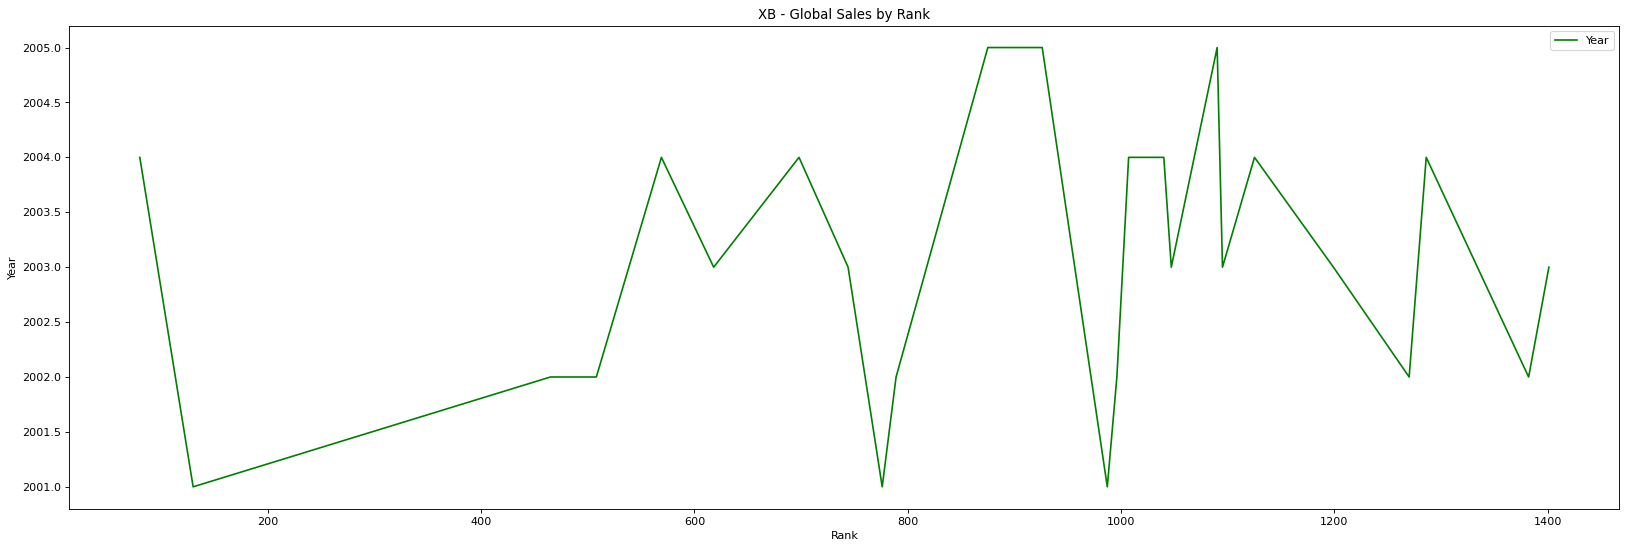

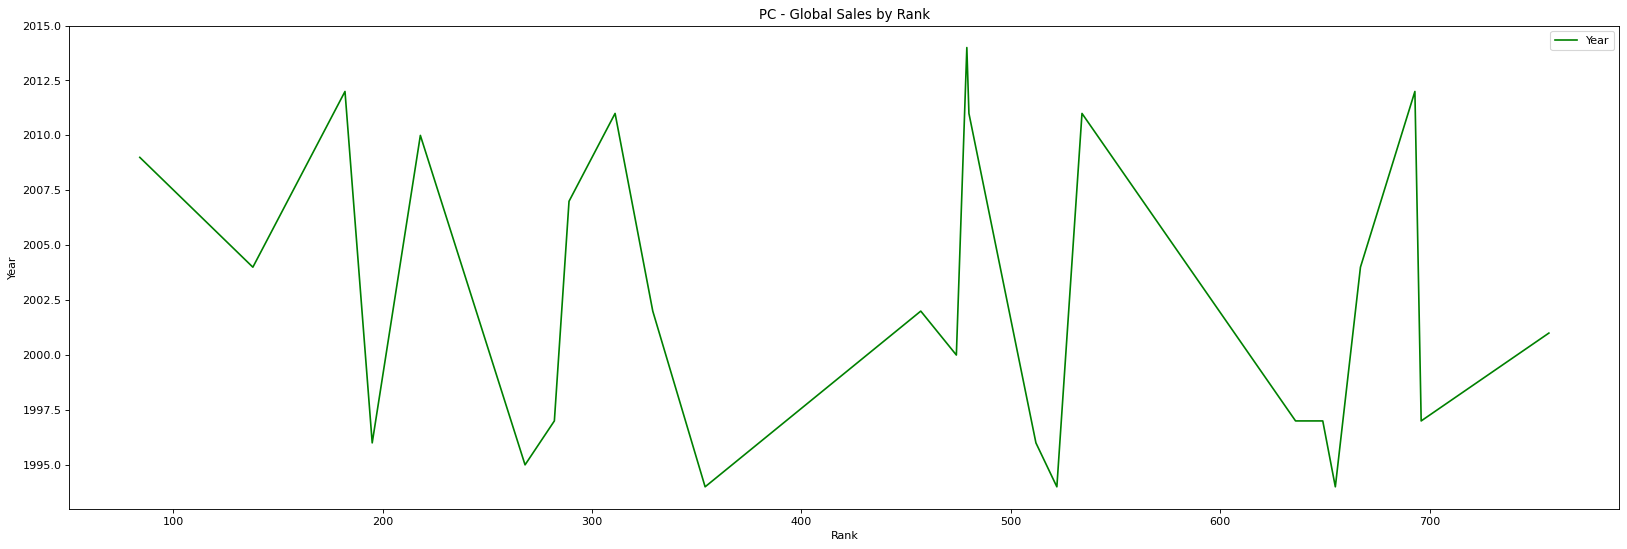

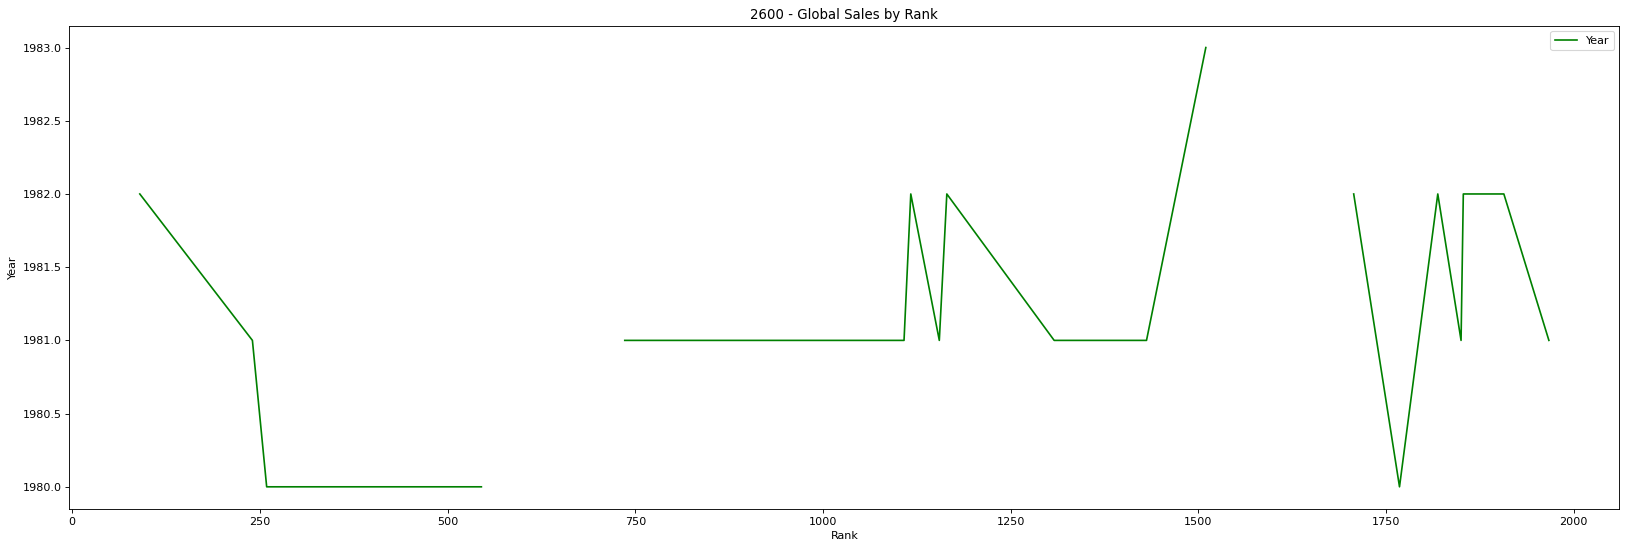

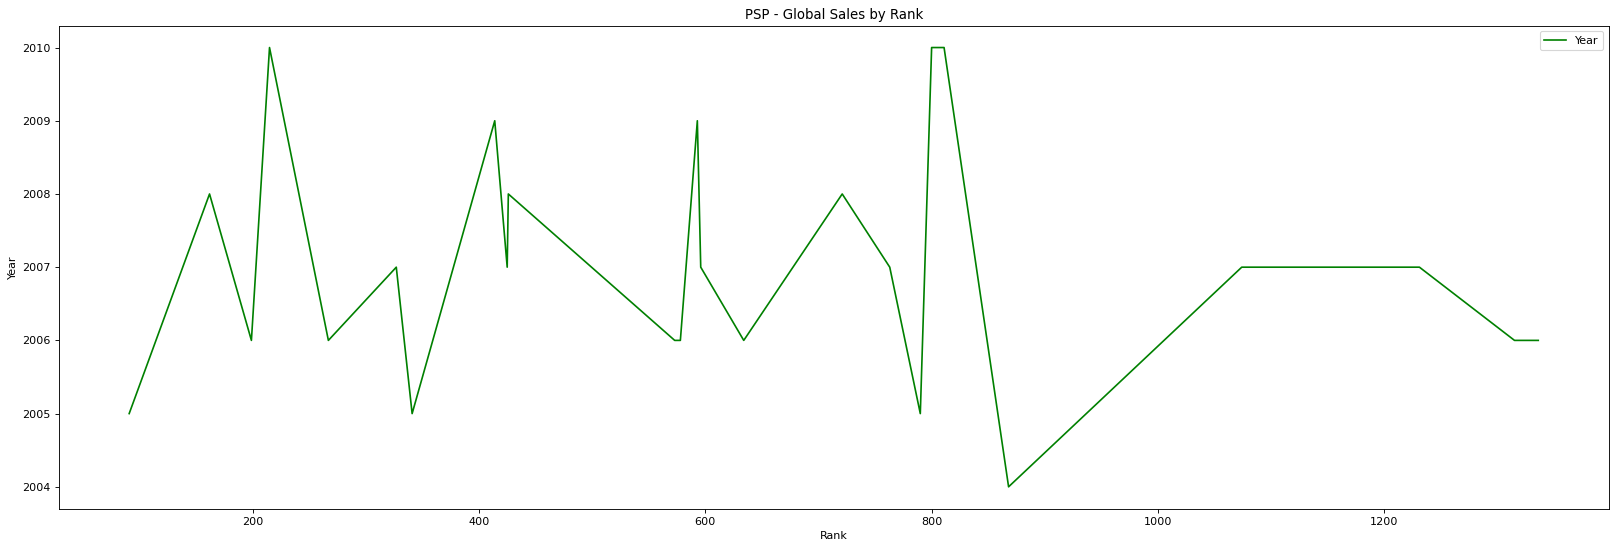

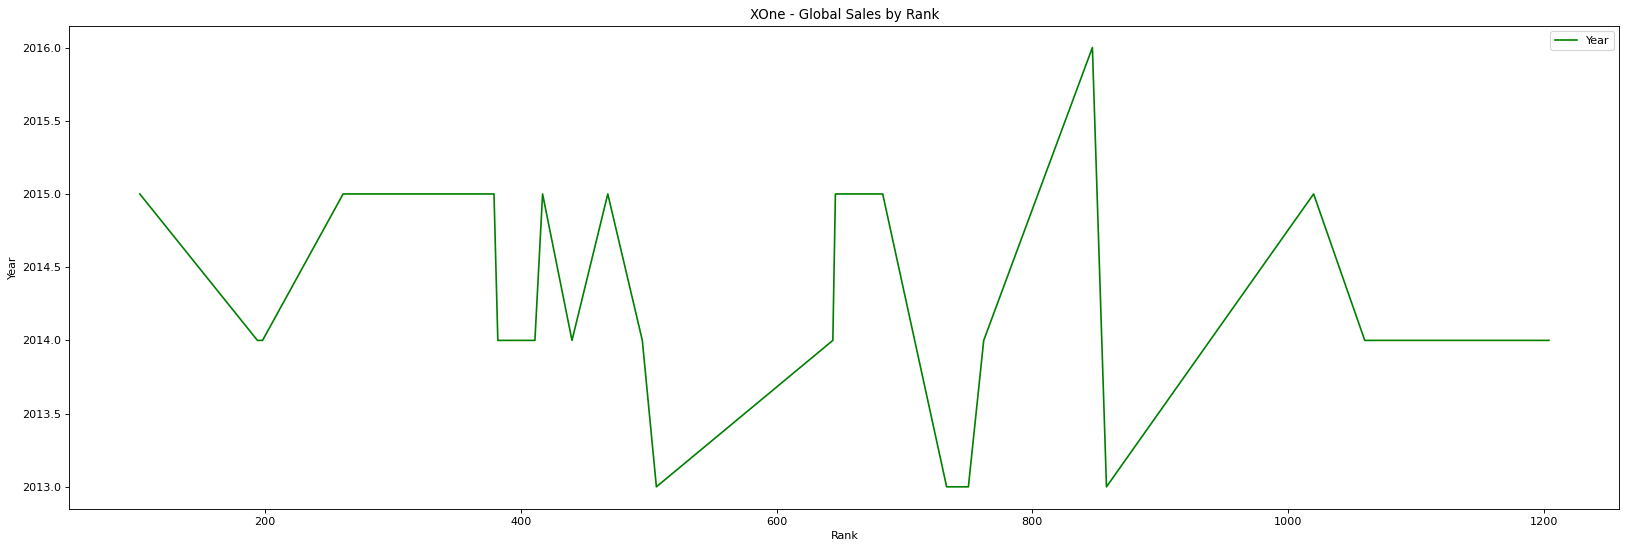

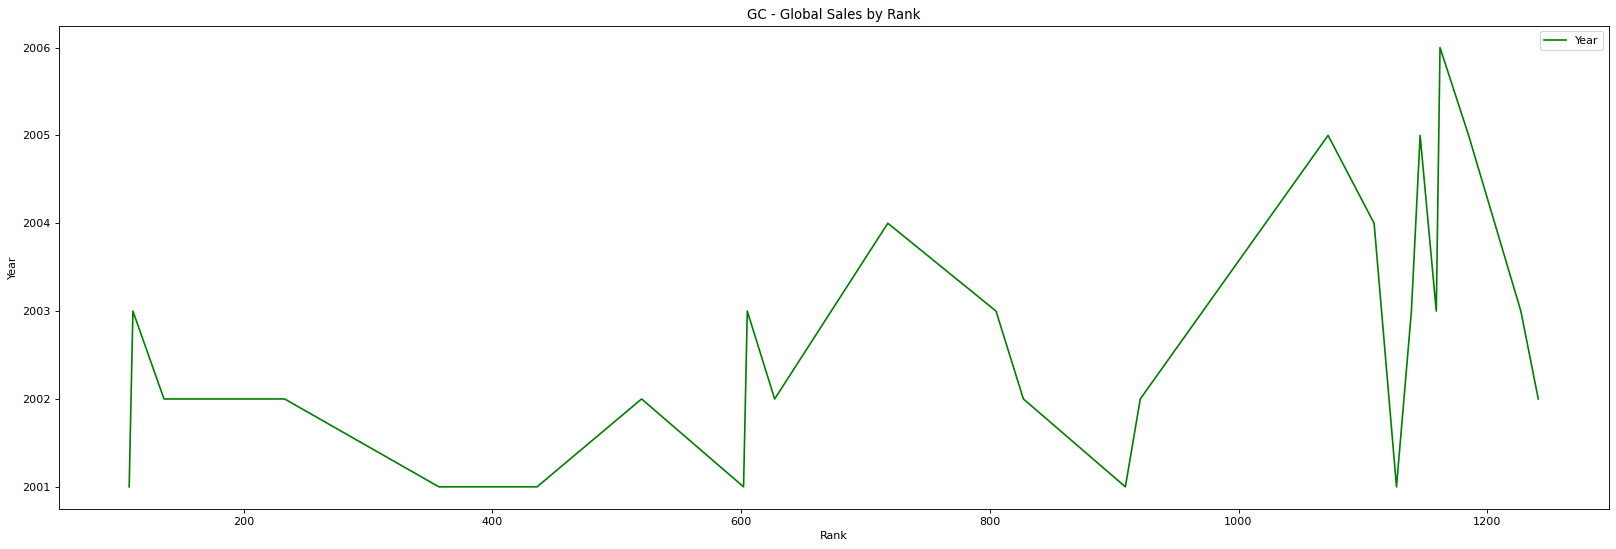

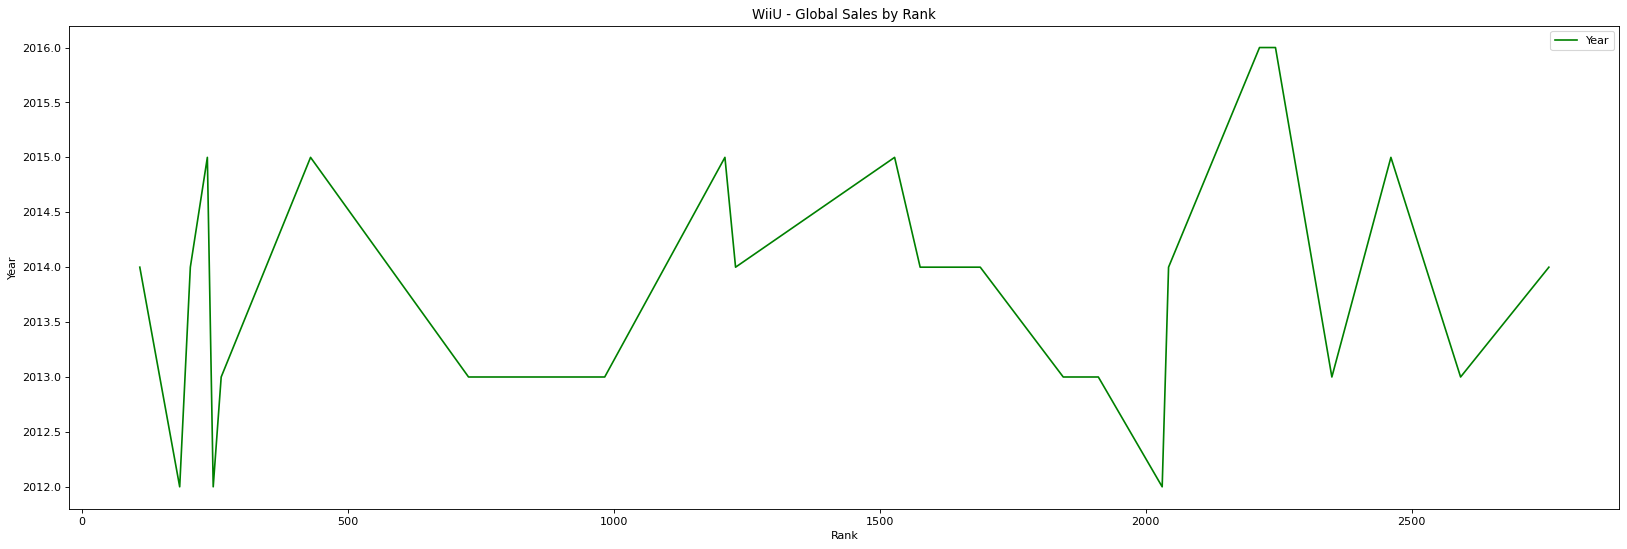

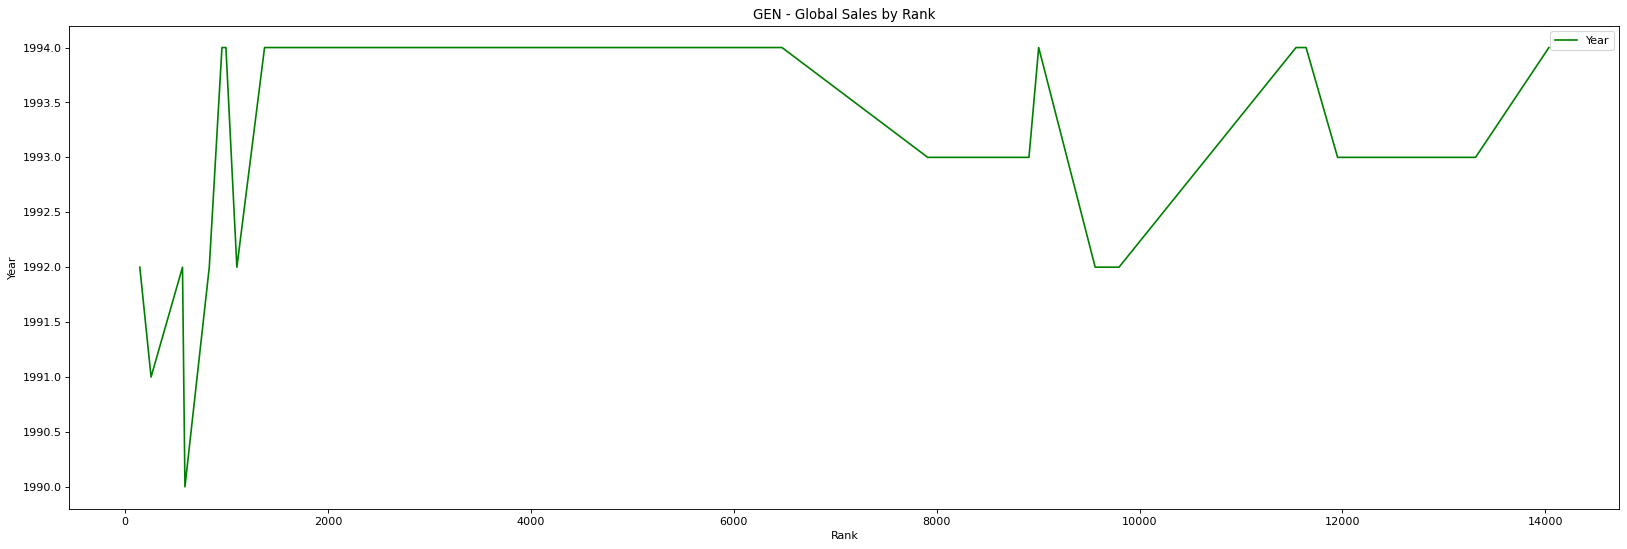

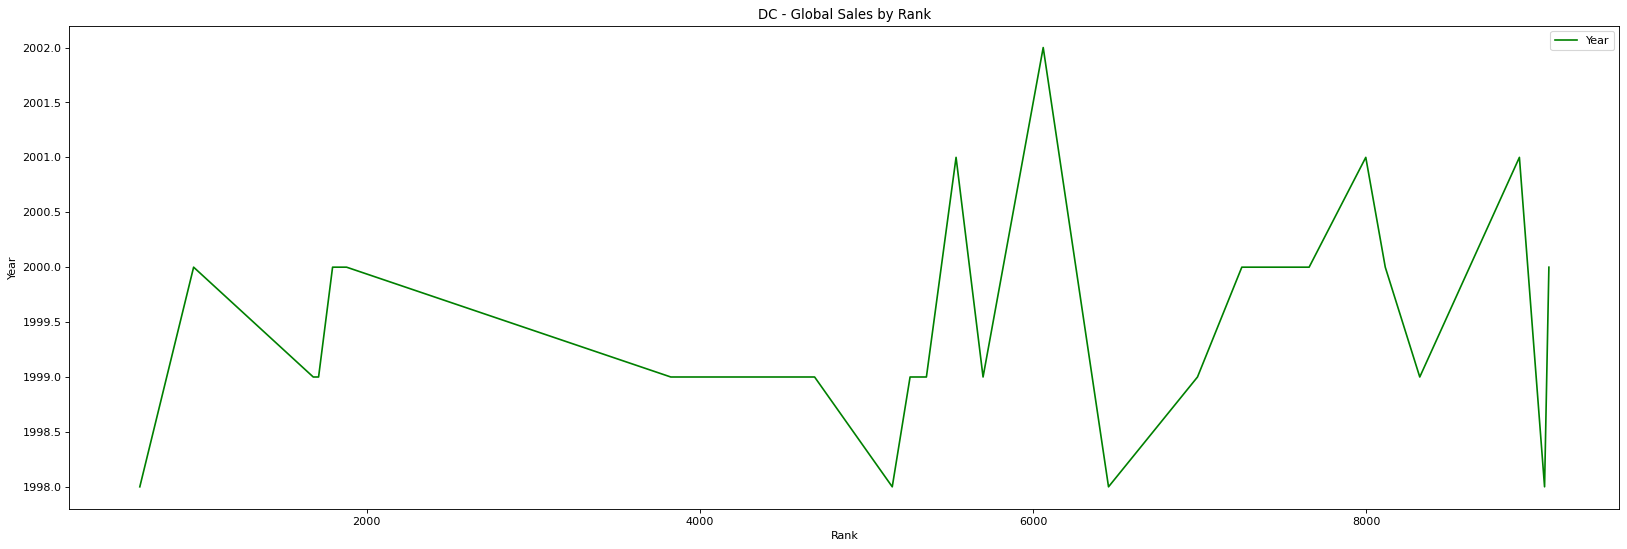

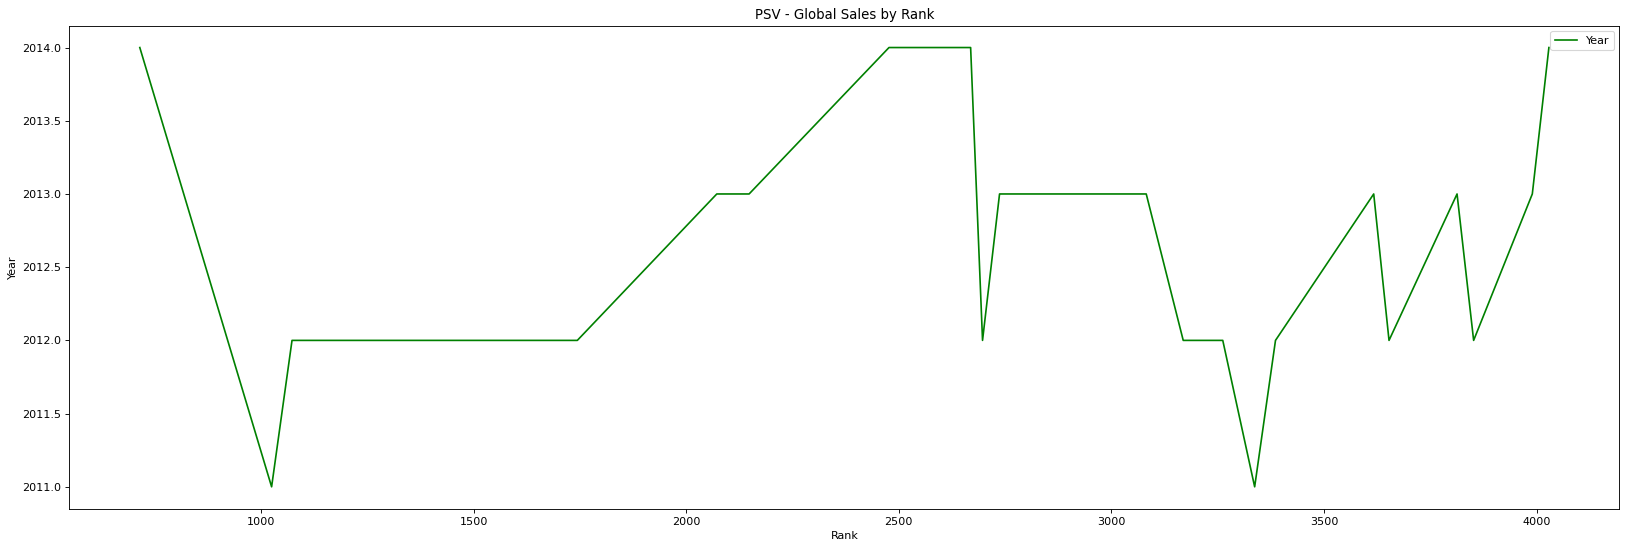

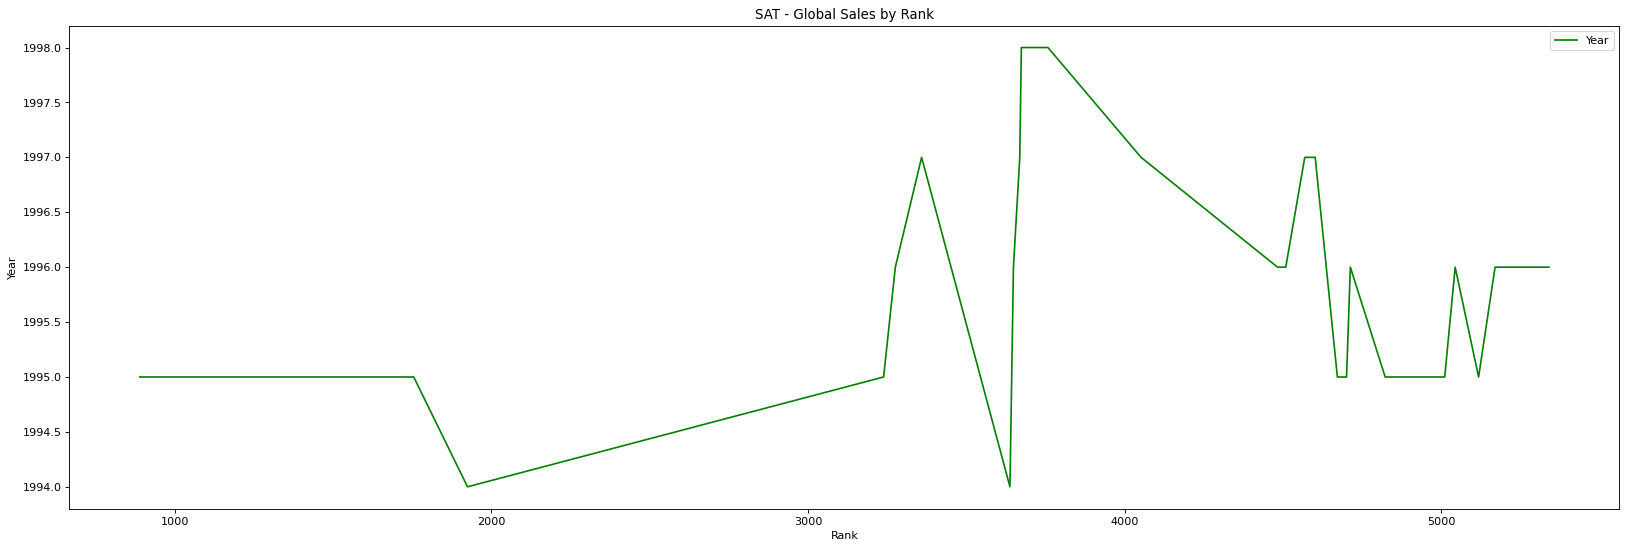

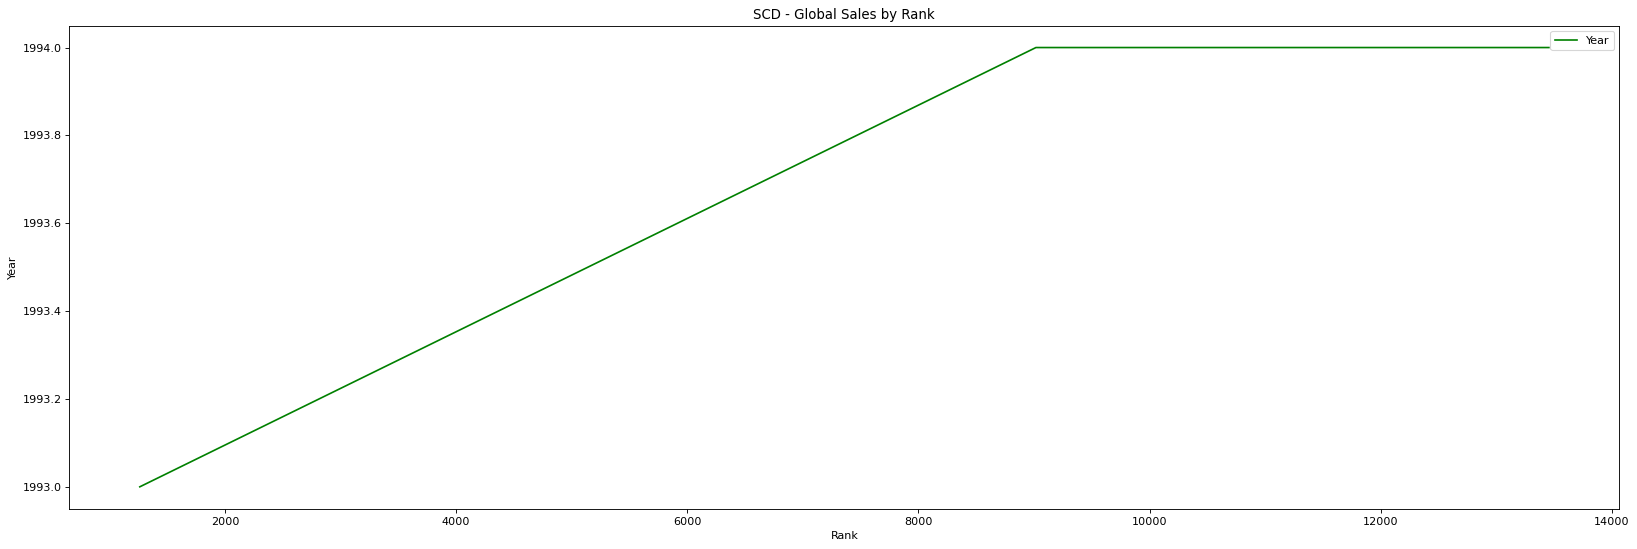

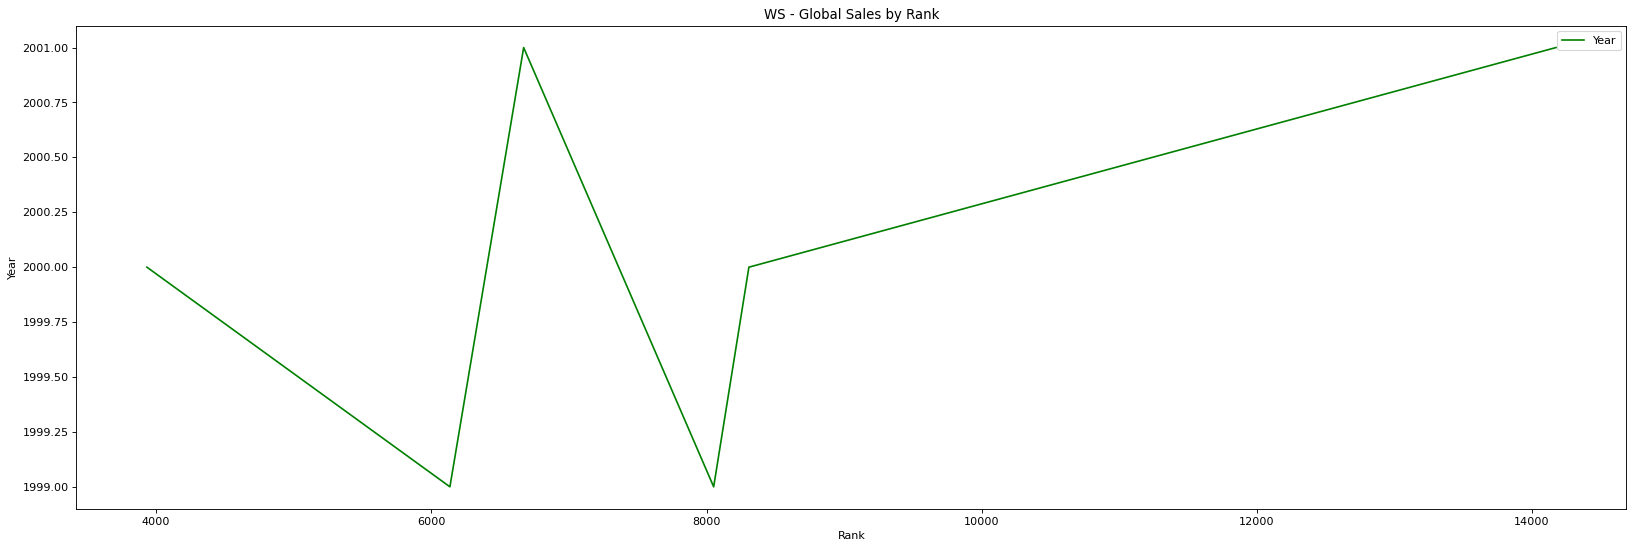

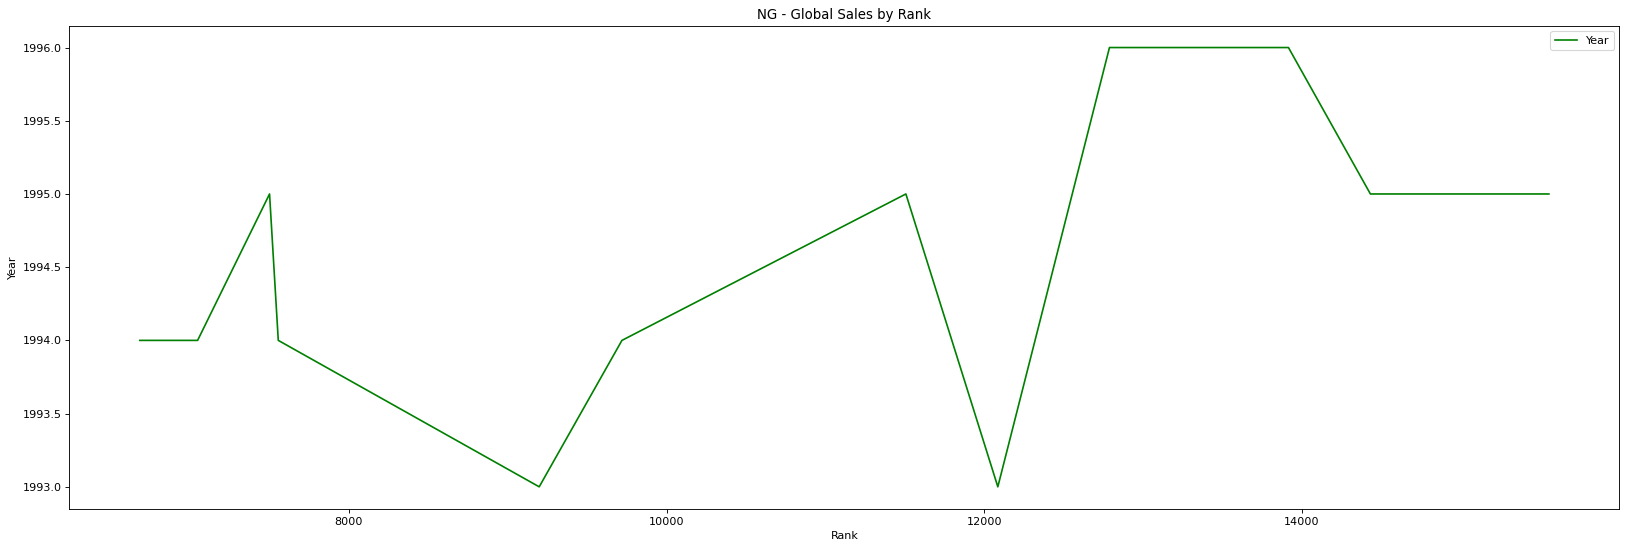

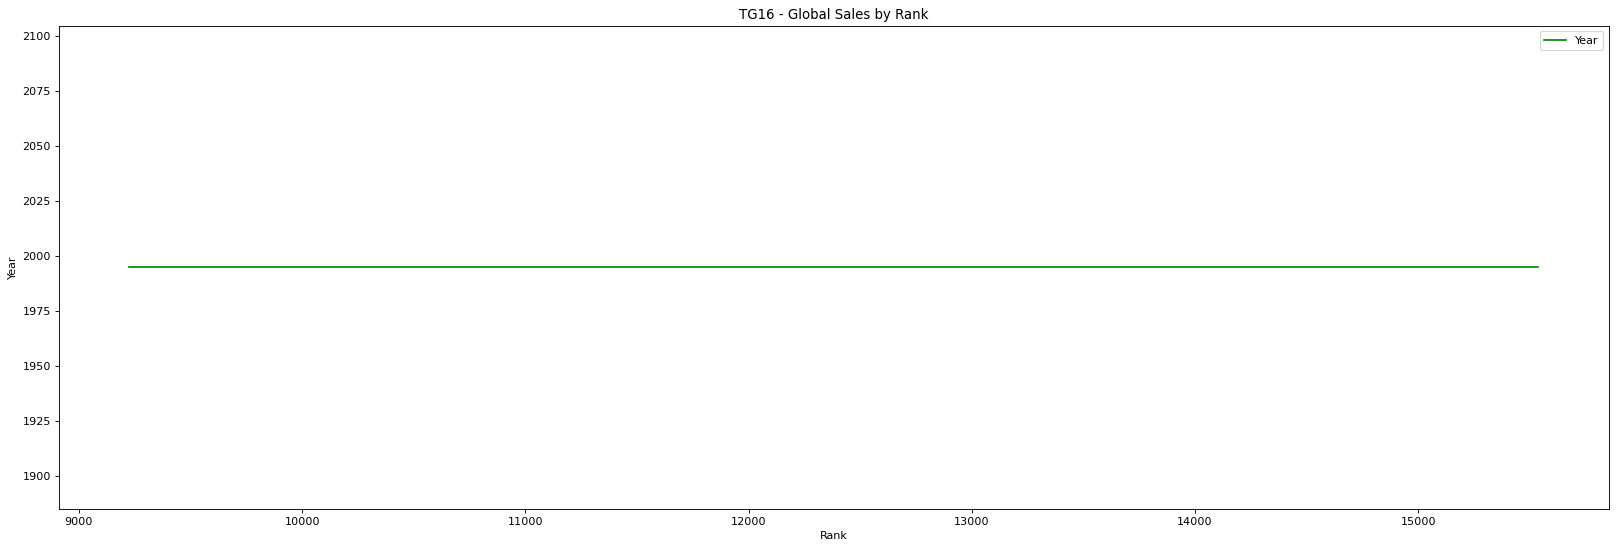

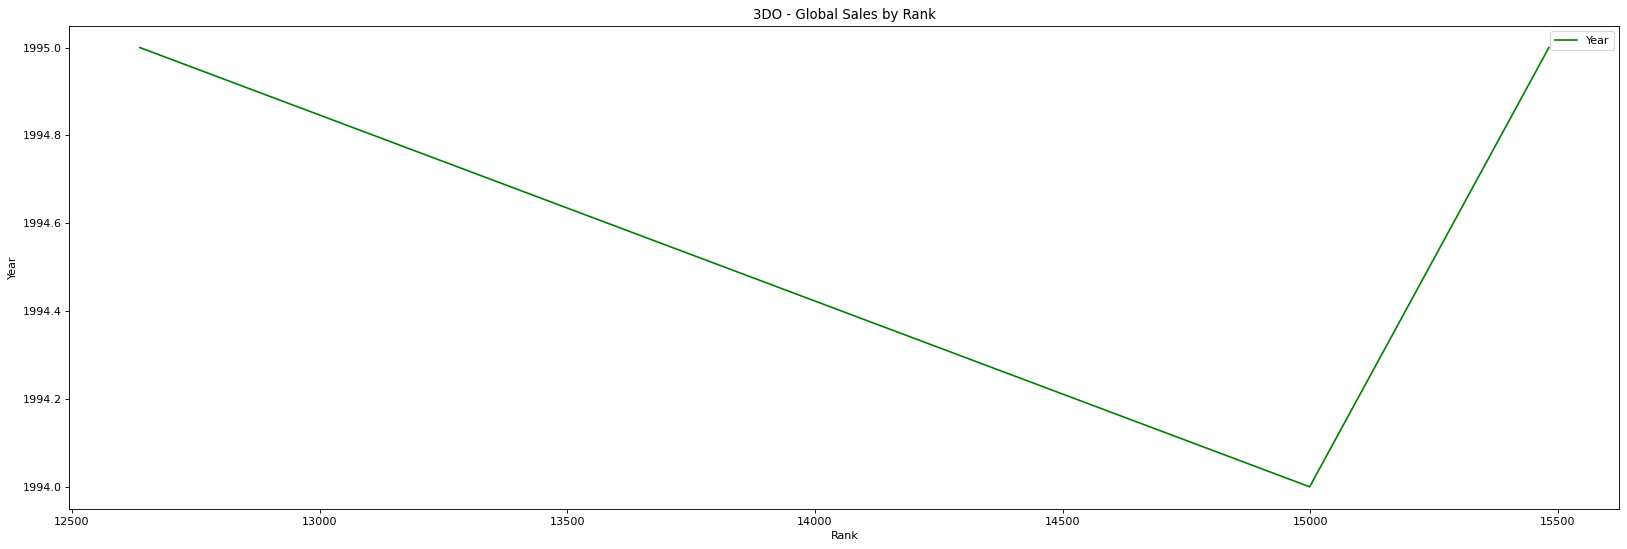

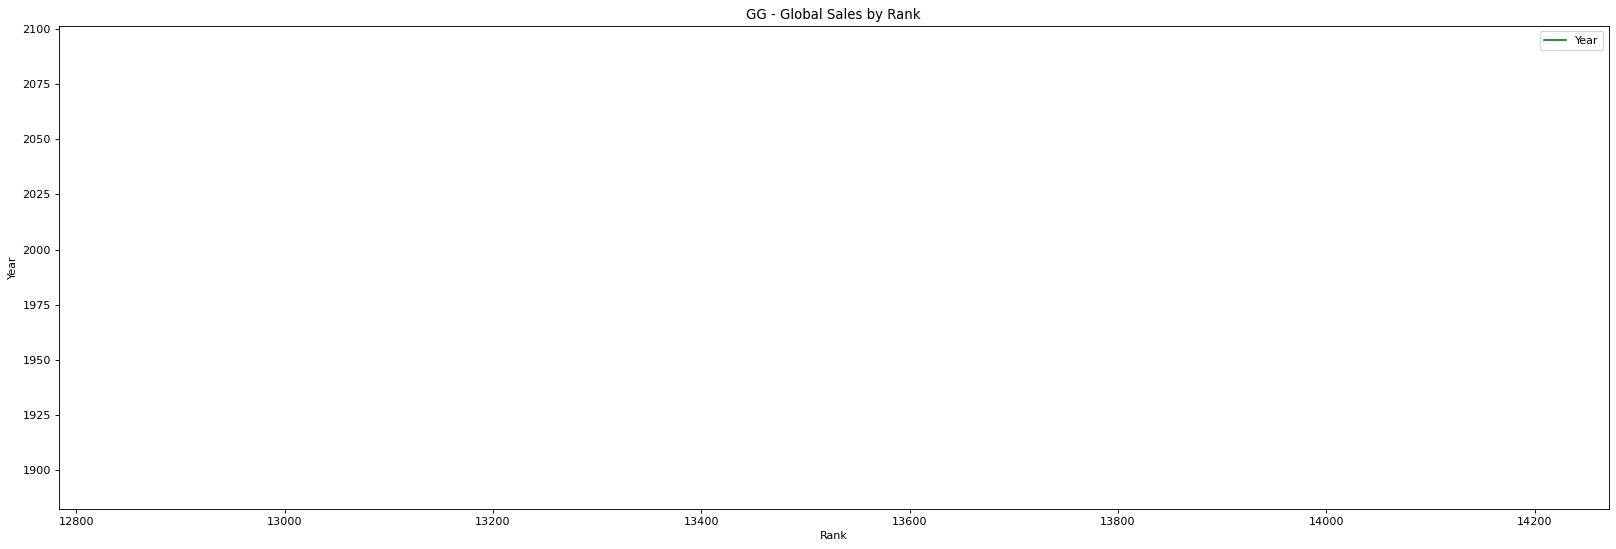

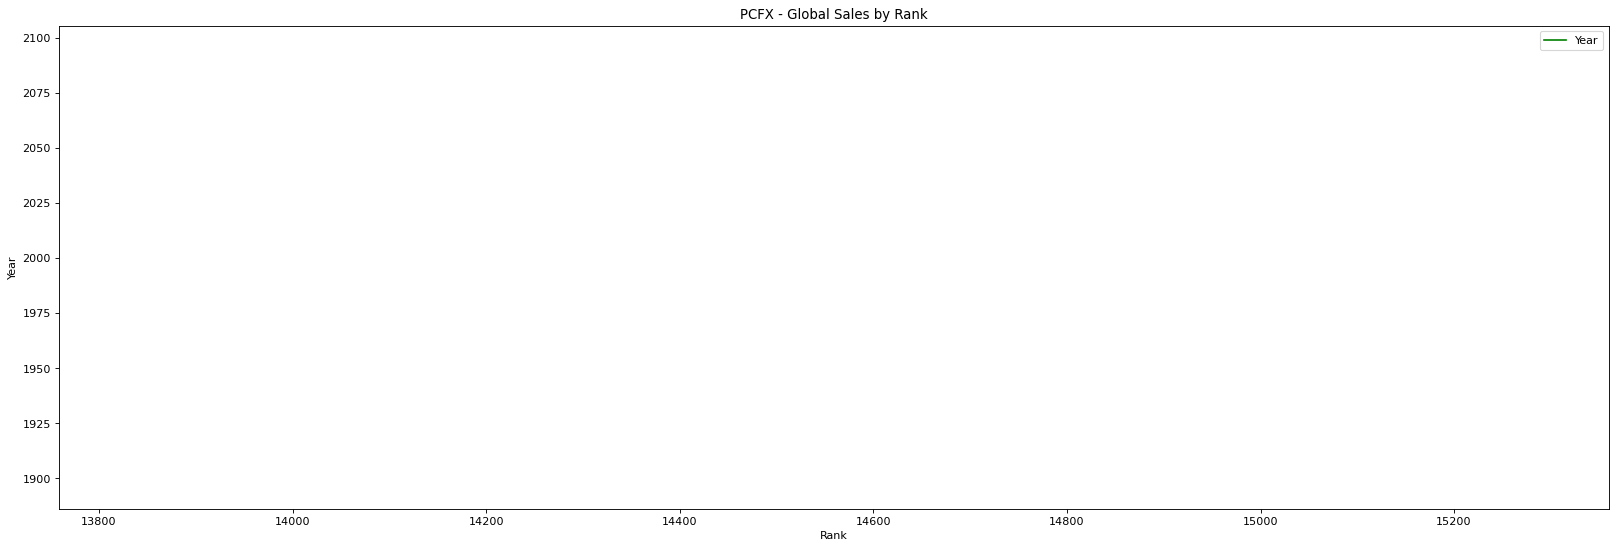

In [64]:
pf_data = pd.read_csv("vgsales.csv")

platforms = pf_data['Platform'].unique()

for pf in platforms:
    data = pf_data.loc[pf_data['Platform'] == pf].head(25)
    
    x = data['Rank']
    y = data['Year']

    plt.figure(figsize=(25,8), dpi= 80)
    plt.plot(x,y, label = 'Year', color = 'green')
    plt.xlabel('Rank')
    plt.ylabel('Year')
    plt.title('{} - Global Sales by Rank'.format(pf))
    plt.legend()
    plt.show()


**Top 10 Platforms,Genres,Publishers with Histogram Plotting**

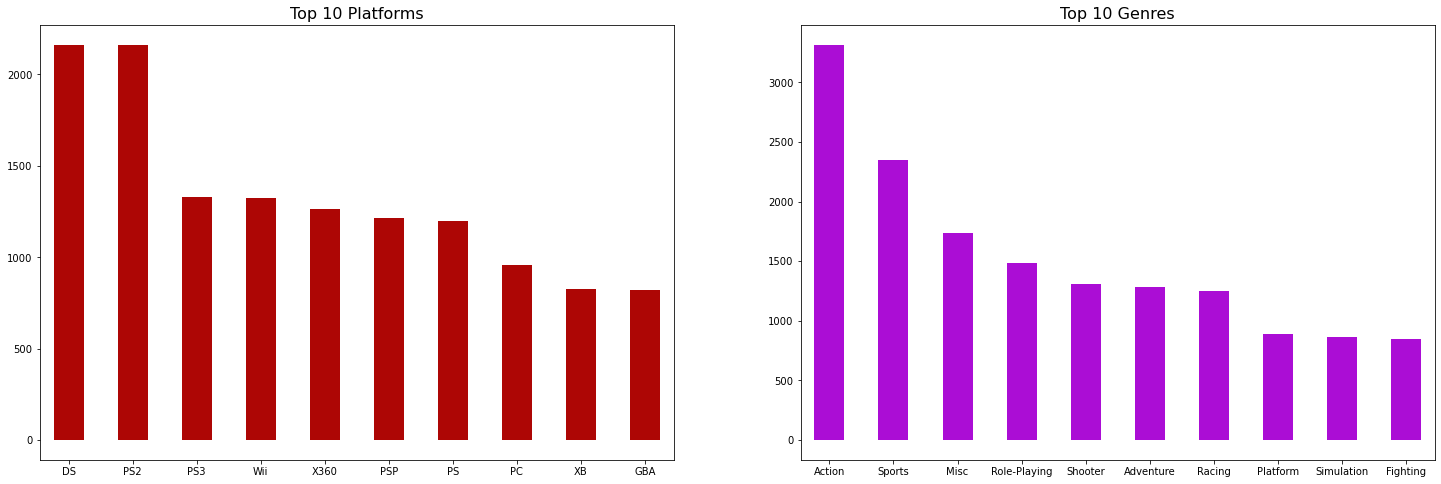

Text(0.5, 1.0, 'Top 10 Publishers')

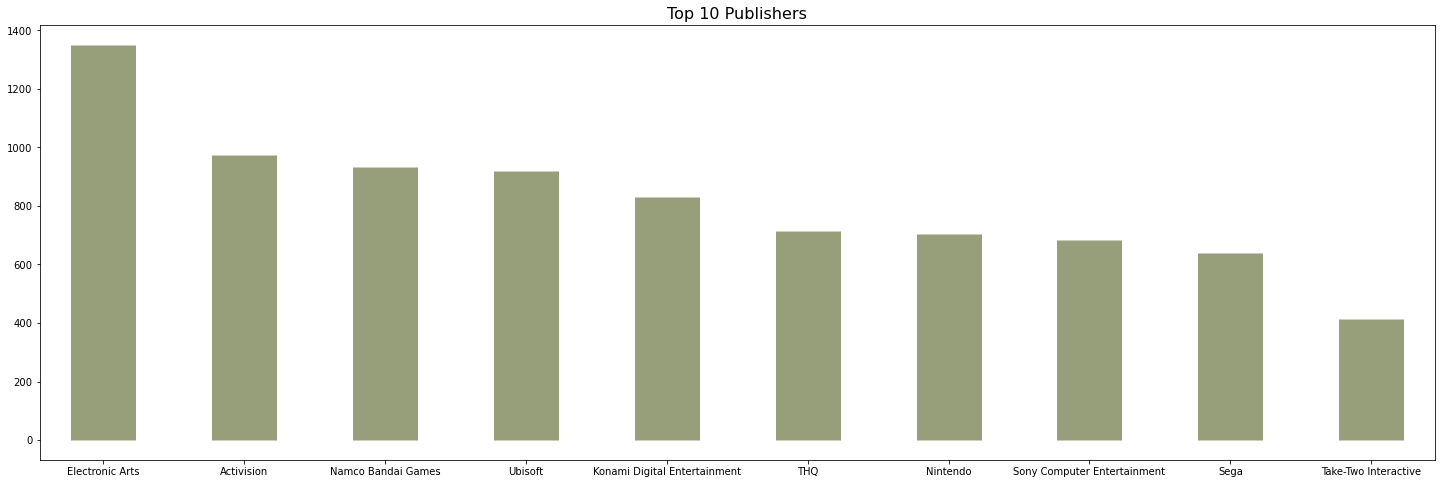

In [56]:
#top platforms (name of the platform,total number of games developed for that platform)
topPlatforms_index = df.Platform.value_counts().head(10).index
topPlatforms_values = df.Platform.value_counts().head(10).values

#top genres (name of the genre,total number of games developed in that genre)
topGenres_index = df.Genre.value_counts().head(10).index
topGenres_values = df.Genre.value_counts().head(10).values

#top game developers/publishers (name of the publisher,total number of games published by that publisher)
topPublisher_index = df.Publisher.value_counts().head(10).index
topPublisher_values = df.Publisher.value_counts().head(10).values

fig, (ax1,ax2) = plt.subplots(1,2,figsize=(25,8), facecolor='white')

##top platforms used for games
ax1.vlines(x=topPlatforms_index, ymin=0, ymax=topPlatforms_values, color='#AD0605', linewidth=30)
ax1.set_title('Top 10 Platforms',fontsize=16)

#top genres of Games accordingly
ax2.vlines(x=topGenres_index, ymin=0, ymax=topGenres_values, color='#AB0DD5', linewidth=30)
ax2.set_title('Top 10 Genres',fontsize=16)
plt.show()

fig, ax = plt.subplots(figsize=(25,8), facecolor='white')

#top publishers of the games
ax.vlines(x=topPublisher_index, ymin=0, ymax=topPublisher_values, linewidth=65, color='#969F79')
ax.set_title('Top 10 Publishers',fontsize=16)


**Observation:**

1.DS and PS2 are the most popular platforms in comparison to others platform.

2.**Action** is the most popular genre and the second most is the **sports**

3.Electronic Arts has published 1300+ products

**TOP 10 PUBLISHERS OF GAMES USING PIE CHART**

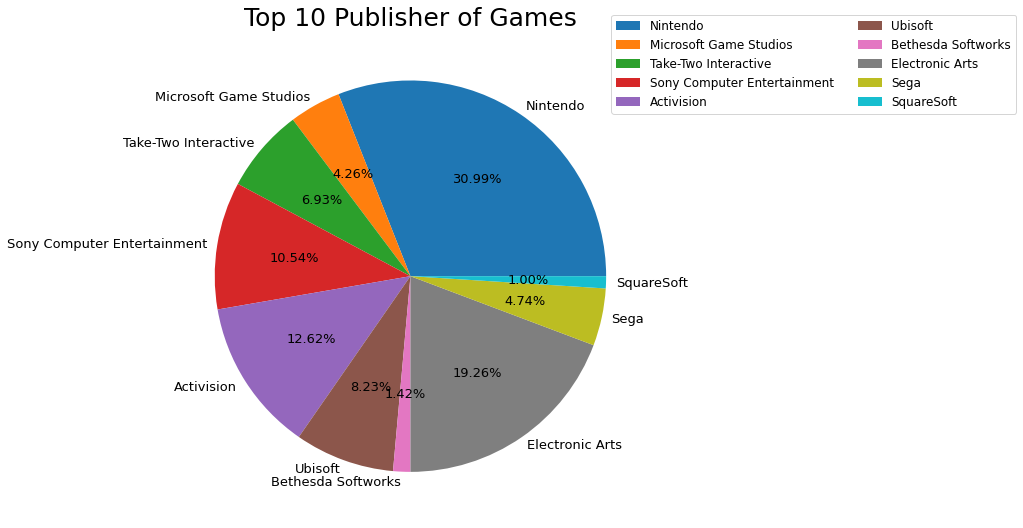

In [201]:
Publisher = list(df.Publisher.unique())
global_sale_of_every_Publisher = pd.Series(dtype = float)

for pub in Publisher :
    data = df.loc[df.Publisher == pub]
    global_sale = sum(data.Global_Sales)
    global_sale_of_every_Publisher[pub] = global_sale
    
#Plotting Top 10 Publishers    
top_10 = global_sale_of_every_Publisher[:10]


# create pie-plot
plt.figure(figsize = (10.5,9))
plt.pie(top_10,labels = top_10.index,autopct = "%.2f%%",textprops = {"fontsize":13},labeldistance = 1.05)

#formatting

plt.legend(loc = 4,fontsize  = 12, bbox_to_anchor =(1.75, 0.82), ncol = 2)
plt.title("Top 10 Publisher of Games",fontdict = {"fontsize":25,"fontweight":100})
plt.savefig("Top 10 Publisher ",dpi = 200)
plt.show()

**Observation:** From the above data,Nintendo is the highest Content contributor with 31% share followed by EA.It clearly shows that Nintendo Platforms seems to be very Popular among consumers.

**Which Genre has highest global sales in Nintendo?**

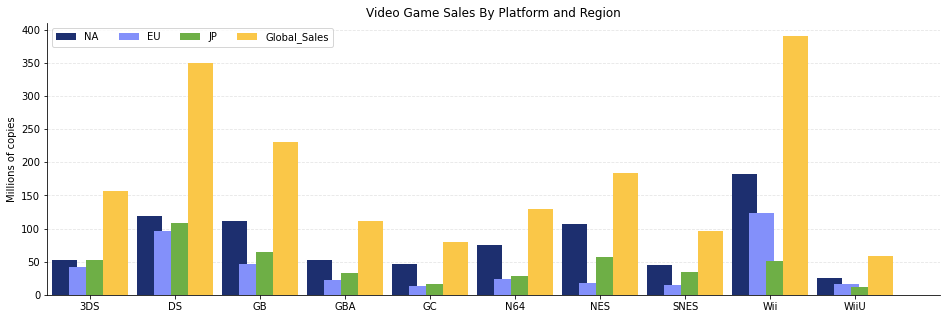

In [252]:

data = df.loc[df['Publisher'] == 'Nintendo']


df_grouped = data.groupby('Platform').sum()[['NA_Sales','EU_Sales','JP_Sales','Other_Sales', 'Global_Sales']]


# define figure
fig, ax = plt.subplots(1, figsize=(16,5))

# numerical x
x = np.arange(0, len(df_grouped.index))

# plot bars
plt.bar(x - 0.3, df_grouped['NA_Sales'], width = 0.3, color = '#1D2F6F')
plt.bar(x - 0.1, df_grouped['EU_Sales'], width = 0.3, color = '#8390FA')
plt.bar(x + 0.1, df_grouped['JP_Sales'], width = 0.3, color = '#6EAF46')
plt.bar(x + 0.3, df_grouped['Global_Sales'], width = 0.3, color = '#FAC748')

# remove spines
ax.spines['right'].set_visible(False)
ax.spines['top'].set_visible(False)

# x y details
plt.ylabel('Millions of copies')
plt.xticks(x, df_grouped.index)
plt.xlim(-0.5, 10)

# grid lines
ax.set_axisbelow(True)
ax.yaxis.grid(color='gray', linestyle='dashed', alpha=0.2)

# title and legend
plt.title('Video Game Sales By Platform and Region', loc ='center')
plt.legend(['NA', 'EU', 'JP', 'Global_Sales'], loc='upper left', ncol = 4)
plt.show()

**Observation**: Wii Console has the Highest sales and the WiiU Console has the least sales. Another key observation is that the sales in the North America has contributed more towards Wii console.

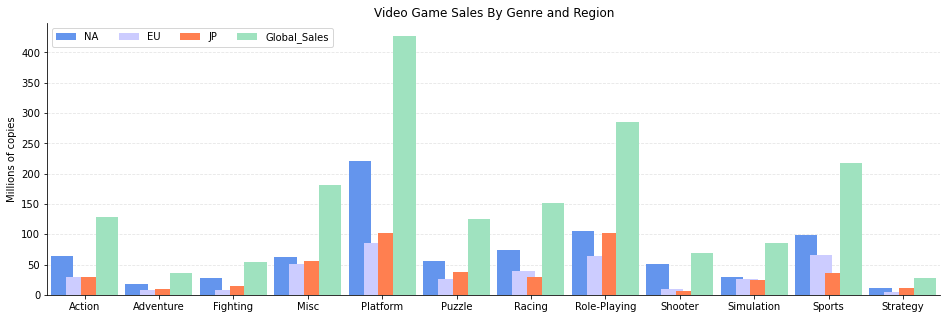

In [257]:
# plt.figure(figsize=(20,5))
data = df.loc[df['Publisher'] == 'Nintendo']
df_grouped = data.groupby('Genre').sum()[['NA_Sales','EU_Sales','JP_Sales','Global_Sales']]

# define figure
fig, ax = plt.subplots(1, figsize=(16,5))

# numerical x
x = np.arange(0, len(df_grouped.index))

# plot bars
plt.bar(x - 0.3, df_grouped['NA_Sales'], width = 0.3, color = '#6495ED')
plt.bar(x - 0.1, df_grouped['EU_Sales'], width = 0.3, color = '#CCCCFF')
plt.bar(x + 0.1, df_grouped['JP_Sales'], width = 0.3, color = '#FF7F50')
plt.bar(x + 0.3, df_grouped['Global_Sales'], width = 0.3, color = '#9FE2BF')

# remove spines
ax.spines['right'].set_visible(False)
ax.spines['top'].set_visible(False)

# x y details
plt.ylabel('Millions of copies')
plt.xticks(x, df_grouped.index)
plt.xlim(-0.5, 11.5)

# grid lines
ax.set_axisbelow(True)
ax.yaxis.grid(color='gray', linestyle='dashed', alpha=0.2)

# title and legend
plt.title('Video Game Sales By Genre and Region', loc ='center')
plt.legend(['NA', 'EU', 'JP', 'Global_Sales'], loc='upper left', ncol = 4)
plt.show()

**Observation:** **Platform** seems to be very popular genre globally and North America consumers seems to be subscribing to this genre a lot and is comparable to other Genre's. 

**Percentage of Each Genre of Games**

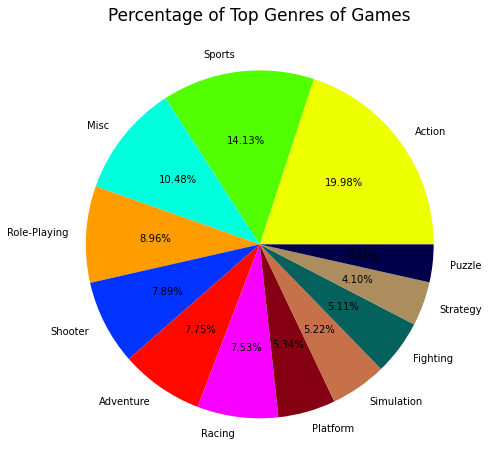

In [74]:
Genre = df.Genre
Genre = Genre.value_counts()

plt.figure(figsize = (8,8))
labels = Genre.index
colors = ["#eeff00","#51ff00","#00ffdd","#ff9d00","#0033ff","#ff0800","#f700ff","#850012","#c7714a","#04615b","#ab8d5e","#00004a"]
plt.pie(Genre,labels = labels,colors = colors,autopct = "%.2f%%") 
plt.title("Percentage of Top Genres of Games",fontdict = {"fontsize":17})
plt.savefig("Top Genres Chart",dpi = 200)
plt.show()

**Observation:** From the above data,Action is the Top Genre followed by Sports.

**Best Selling Games in Countries**

Text(0.5, 1.0, 'Best selling games in Japan')

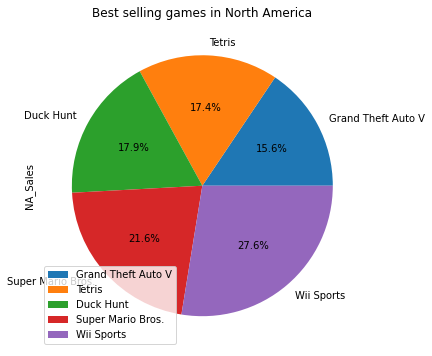

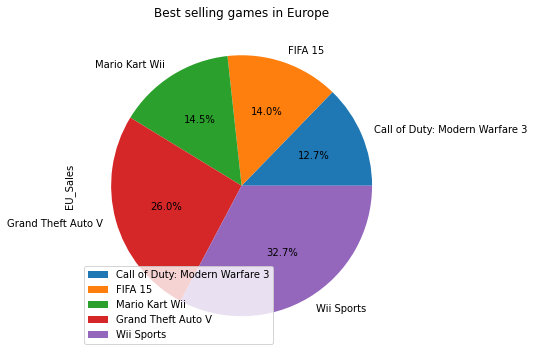

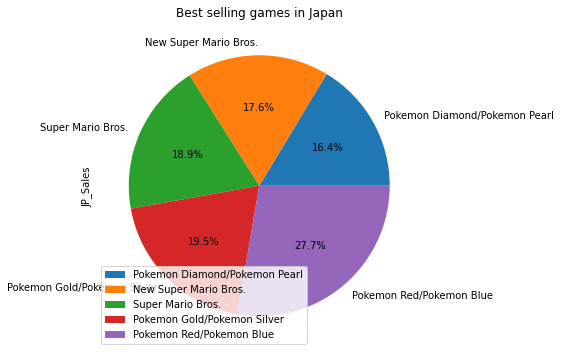

In [258]:
#Pie Plot

# For North America
df1 = pd.DataFrame(df.groupby('Name')['NA_Sales'].sum())
df1.sort_values(by=['NA_Sales'], inplace=True)
df1 = df1.tail(5)
df1.plot.pie(y='NA_Sales', autopct='%1.1f%%', figsize=(6, 6))
plt.title("Best selling games in North America")

# For Europe Sales
df1 = pd.DataFrame(df.groupby('Name')['EU_Sales'].sum())
df1.sort_values(by=['EU_Sales'], inplace=True)
df1 = df1.tail(5)
df1.plot.pie(y='EU_Sales', autopct='%1.1f%%', figsize=(6, 6))
plt.title("Best selling games in Europe")


# For Japan Sales
df1 = pd.DataFrame(df.groupby('Name')['JP_Sales'].sum())
df1.sort_values(by=['JP_Sales'], inplace=True)
df1 = df1.tail(5)
df1.plot.pie(y='JP_Sales', autopct='%1.1f%%', figsize=(6, 6))
plt.title("Best selling games in Japan")

**Observation:**

1.In North America  **Wii Sports** has the highest Sales with contributing(28%),In europe also **Wii Sports** contributing (33%) of sales.

2.In Japan **Pokemon Red/Pokemon Blue** has the highest sales with contributing (28%).

# Inferential Statistical Analysis

### Creating a Multivariate Regression Model

Use OLS Regression

In [7]:
platforms = ['Wii','DS','3DS','WiiU']
df2 = df.drop(['Rank'],axis=1)
df2= df2[df2['Platform'].isin(platforms)]
df_dummies = pd.get_dummies(df2,columns = ['Genre'])
#df_dummies
df_grouped = df_dummies.groupby(['Platform','Year']).sum()
#df_grouped = df_grouped.reset_index
df_grouped


NA_Sales  EU_Sales  JP_Sales  Other_Sales  Global_Sales  \
Platform Year                                                              
3DS      2011.0     26.98     18.42     12.80         4.38         62.53   
         2012.0     17.04     11.59     19.92         2.55         51.14   
         2013.0     15.33     14.34     23.52         2.67         55.88   
         2014.0     12.03      8.61     20.64         1.84         43.14   
         2015.0      5.82      4.77     15.39         0.99         26.99   
         2016.0      0.83      0.57      5.03         0.12          6.60   
DS       1985.0      0.00      0.00      0.02         0.00          0.02   
         2004.0      8.42      3.97      3.65         1.37         17.46   
         2005.0     48.47     42.06     29.86        10.91        131.40   
         2006.0     50.63     23.53     38.56         8.28        121.15   
         2007.0     76.36     34.58     26.81        11.27        149.36   
         2008.0     79.40     33.05     24.01        11.16        147.89   
         2009.0     62.41     26.52     24.21         8.73        121.99   
         2010.0     42.36     20.07     19.86         5.73         87.98   
         2011.0     15.29      6.18      4.32         2.02         27.80   
         2012.0      4.21      3.04      3.72         0.63         11.64   
         2013.0      0.72      1.07      0.00         0.17          1.96   
         2014.0      0.02      0.00      0.00         0.00          0.02   
         2020.0      0.27      0.00      0.00         0.02          0.29   
Wii      2006.0     71.30     43.84      9.15        13.56        137.91   
         2007.0     84.25     44.65     12.12        13.75        154.97   
         2008.0     98.77     47.36     12.69        15.25        174.16   
         2009.0    116.54     59.36     16.57        17.79        210.44   
         2010.0     75.03     37.50      8.78        10.47        131.80   
         2011.0     32.72     18.52      5.58         5.50         62.41   
         2012.0     11.46      6.39      3.34         1.59         22.77   
         2013.0      4.91      3.61      0.05         0.81          9.36   
         2014.0      1.82      2.25      0.00         0.36          4.44   
         2015.0      0.57      0.87      0.00         0.12          1.55   
WiiU     2012.0      9.13      5.25      2.13         1.28         17.84   
         2013.0     10.15      6.60      3.54         1.52         21.84   
         2014.0     10.78      6.49      3.16         2.11         22.51   
         2015.0      6.77      4.90      3.41         1.29         16.38   
         2016.0      1.49      0.99      0.55         0.25          3.29   

                 Genre_Action  Genre_Adventure  Genre_Fighting  Genre_Misc  \
Platform Year                                                                
3DS      2011.0            31                4               5          13   
         2012.0            40                6               2           9   
         2013.0            29                6               2          12   
         2014.0            25               12               2           5   
         2015.0            39                4               2          10   
         2016.0            16                4               1           4   
DS       1985.0             1                0               0           0   
         2004.0             1                1               0           3   
         2005.0            18                4               4          18   
         2006.0            40               14               7          38   
         2007.0            54               33              10          70   
         2008.0            58               74               4          92   
         2009.0            63               52               5          61   
         2010.0            53               43               4          70   
         2011.0            30   

In [116]:
x=df_grouped[['Genre_Action','Genre_Adventure','Genre_Fighting','Genre_Misc','Genre_Puzzle','Genre_Racing','Genre_Strategy','Genre_Shooter','Genre_Sports','Genre_Simulation']]
y=df_grouped['Global_Sales']
model=sm.OLS(y, x)
results=model.fit()
results.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                 OLS Regression Results                                
=======================================================================================
Dep. Variable:           Global_Sales   R-squared (uncentered):                   0.933
Model:                            OLS   Adj. R-squared (uncentered):              0.905
Method:                 Least Squares   F-statistic:                              33.23
Date:                Sun, 04 Apr 2021   Prob (F-statistic):                    1.23e-11
Time:                        19:03:22   Log-Likelihood:                         -153.96
No. Observations:                  34   AIC:                                      327.9
Df Residuals:                      24   BIC:                                      343.2
Df Model:                          10                                                  
Covariance Type:            nonrobust                                                  
====================================================================================
                       coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------
Genre_Action         0.7300      0.454      1.609      0.121      -0.206       1.666
Genre_Adventure      1.5762      2.033      0.775      0.446      -2.619       5.772
Genre_Fighting       0.1934      3.708      0.052      0.959      -7.461       7.847
Genre_Misc          -0.1096      0.785     -0.140      0.890      -1.730       1.511
Genre_Puzzle        -0.3283      1.246     -0.264      0.794      -2.899       2.243
Genre_Racing         9.4189      3.927      2.399      0.025       1.315      17.523
Genre_Strategy       4.1567      3.231      1.287      0.210      -2.511      10.824
Genre_Shooter        5.5252      4.315      1.280      0.213      -3.381      14.431
Genre_Sports        -2.1699      1.470     -1.476      0.153      -5.204       0.864
Genre_Simulation    -2.0772      2.035     -1.021      0.317      -6.276       2.122
==============================================================================
Omnibus:                       12.317   Durbin-Watson:                   1.878
Prob(Omnibus):                  0.002   Jarque-Bera (JB):               14.324
Skew:                           0.998   Prob(JB):                     0.000776
Kurtosis:                       5.475   Cond. No.                         69.7
==============================================================================

Notes:
[1] R² is computed without centering (uncentered) since the model does not contain a constant.
[2] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [126]:
new = pd.DataFrame([[30,8,45,0,14,0,10,15,15,18]],
columns=['Genre_Action','Genre_Adventure','Genre_Fighting','Genre_Misc','Genre_Puzzle','Genre_Racing','Genre_Strategy','Genre_Shooter','Genre_Sports','Genre_Simulation'])
results.predict(new)

0    93.123782
dtype: float64

**Final Conclusion :**

Key Insights and Analysis : 










1. Having diversified consoles that are successful will help Nintendo to continue to be a leader in video game sales.

2. Though Nintendo is currently a leader,  Increasing content in a few of the high-performing genres will help Nintendo not lose market share to competitors such as Microsoft and Sony.

3. Number of games being released on successful consoles have a direct impact on sales trend. Nintendo had a 65% drop in sales due to a 40% drop in the number of games being produced for a successful console Wii in the second half of its lifespan.

4. Nintendo will have a successful run for the future console if sales are targeted towards mid-range deals instead of only large deals which is evident from their 50% of sales range from 20M - 60M deals

5. As exclusives play a major factor when edging out the competition, as they give incentive for a consumer to pick their system resulting in more sales. In order to optimize production and lower cost and money, Nintendo should only focus on the genres which play to its strong suit and put more emphasis on the quality of the gaming content

6. For any gaming console, the first few years after launch are very crucial for its success. Nintendo Wii and DS were able to generate average sales of 200M in the first four years

7. The difference between the Nintendo Wii and WiiU console is that Wii is less costly whereas WiiU price is not user-friendly. There is a huge loss of revenue for Nintendo due to WiiU and also life span (2012-2015) of the gaming console WiiU is very less when we compared to the Wii (2006-2015)

8. Compared to the XboxOne and  Playstation 4, the Wii U had worse graphics and less processing power. This meant developers would have to cater to the Wii U's limitations when developing third-party games